# Machine Learning - 2: Project 

# Problem 1

Context

CNBE, a prominent news channel, is gearing up to provide insightful coverage of recent elections, recognizing the importance of data-driven analysis. A comprehensive survey has been conducted, capturing the perspectives of 1525 voters across various demographic and socio-economic factors. This dataset encompasses 9 variables, offering a rich source of information regarding voters' characteristics and preferences.

Objective

The primary objective is to leverage machine learning to build a predictive model capable of forecasting which political party a voter is likely to support. This predictive model, developed based on the provided information, will serve as the foundation for creating an exit poll. The exit poll aims to contribute to the accurate prediction of the overall election outcomes, including determining which party is likely to secure the majority of seats.

Data Description

- vote: Party choice: Conservative or Labour
- age: in years
- economic.cond.national: Assessment of current national economic conditions, 1 to 5.
- economic.cond.household: Assessment of current household economic conditions, 1 to 5.
- Blair: Assessment of the Labour leader, 1 to 5.
- Hague: Assessment of the Conservative leader, 1 to 5.
- Europe: an 11-point scale that measures respondents' attitudes toward European integration.
- High scores represent ‘Eurosceptic’ sentiment.
- political.knowledge: Knowledge of parties' positions on European integration, 0 to 3.
- gender: female or male.

In [460]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np


# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)
# setting the precision of floating numbers to 5 decimal points
pd.set_option("display.float_format", lambda x: "%.5f" % x)

# Library to split data
from sklearn.model_selection import train_test_split

# To build model for prediction
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# To tune different models
from sklearn.model_selection import GridSearchCV


# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    ConfusionMatrixDisplay,
    precision_recall_curve,
    roc_curve,
    make_scorer,
)

import warnings
warnings.filterwarnings("ignore")

from scipy.stats import zscore

In [461]:
data = pd.read_excel(r'D:\dsba\ml - 2\electiondata.xlsx', sheet_name='Election_Dataset_Two Classes')

In [462]:
# copying data to another variable to avoid any changes to original data
df = data.copy()

In [463]:
df.head()

,Unnamed: 0,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,1,Labour,43,3,3,4,1,2,2,female
1,2,Labour,36,4,4,4,4,5,2,male
2,3,Labour,35,4,4,5,2,3,2,male
3,4,Labour,24,4,2,2,1,4,0,female
4,5,Labour,41,2,2,1,1,6,2,male


In [464]:
df.tail()

,Unnamed: 0,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
1520,1521,Conservative,67,5,3,2,4,11,3,male
1521,1522,Conservative,73,2,2,4,4,8,2,male
1522,1523,Labour,37,3,3,5,4,2,2,male
1523,1524,Conservative,61,3,3,1,4,11,2,male
1524,1525,Conservative,74,2,3,2,4,11,0,female


In [465]:
data.shape

(1525, 10)

In [466]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               1525 non-null   int64 
 1   vote                     1525 non-null   object
 2   age                      1525 non-null   int64 
 3   economic.cond.national   1525 non-null   int64 
 4   economic.cond.household  1525 non-null   int64 
 5   Blair                    1525 non-null   int64 
 6   Hague                    1525 non-null   int64 
 7   Europe                   1525 non-null   int64 
 8   political.knowledge      1525 non-null   int64 
 9   gender                   1525 non-null   object
dtypes: int64(8), object(2)
memory usage: 119.3+ KB


In [467]:
# checking for duplicate values
duplicate = df.duplicated()
print('Number of duplicate rows = %d' % (duplicate.sum()))

Number of duplicate rows = 0


## 1) Define the problem and perform Exploratory Data Analysis

In [468]:
#Statistical summary of data
df.describe()

,Unnamed: 0,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge
count,1525.00000,1525.00000,1525.00000,1525.00000,1525.00000,1525.00000,1525.00000,1525.00000
mean,763.00000,54.18230,3.24590,3.14033,3.33443,2.74689,6.72852,1.54230
std,440.37389,15.71121,0.88097,0.92995,1.17482,1.23070,3.29754,1.08331
min,1.00000,24.00000,1.00000,1.00000,1.00000,1.00000,1.00000,0.00000
25%,382.00000,41.00000,3.00000,3.00000,2.00000,2.00000,4.00000,0.00000
50%,763.00000,53.00000,3.00000,3.00000,4.00000,2.00000,6.00000,2.00000
75%,1144.00000,67.00000,4.00000,4.00000,4.00000,4.00000,10.00000,2.00000
max,1525.00000,93.00000,5.00000,5.00000,5.00000,5.00000,11.00000,3.00000


In [469]:
# Making a list of all catrgorical variables
cat_col = list(data.select_dtypes("object").columns)

# Printing number of count of each unique value in each column
for column in cat_col:
    print(data[column].value_counts())
    print("-" * 50)

Labour          1063
Conservative     462
Name: vote, dtype: int64
--------------------------------------------------
female    812
male      713
Name: gender, dtype: int64
--------------------------------------------------


In [470]:
df.drop(["Unnamed: 0"], axis=1, inplace=True)

### Univariate Analysis

In [471]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(df, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=df, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=df, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=df, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        df[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        df[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

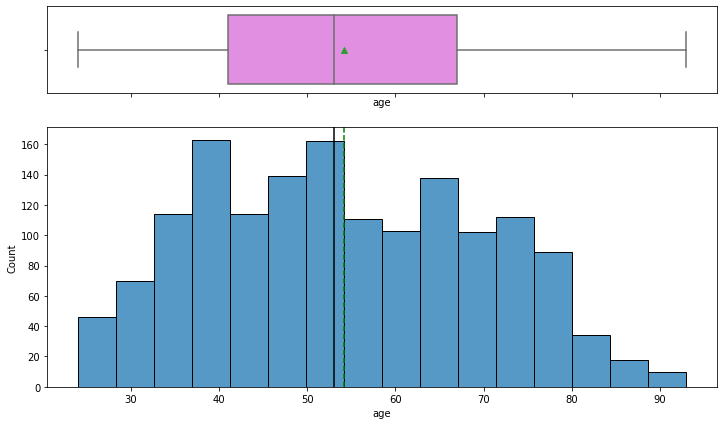

In [472]:
#Observations on age
histogram_boxplot(df, "age")

In [473]:
# function to create labeled barplots


def labeled_barplot(df, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(df[feature])  # length of the column
    count = df[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=df,
        x=feature,
        palette="Paired",
        order=df[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

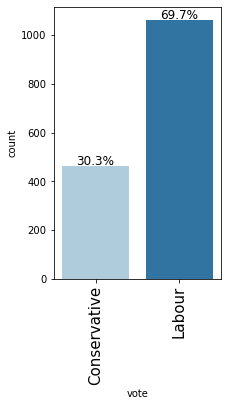

In [474]:
#Observation on vote
labeled_barplot(df, "vote", perc=True)

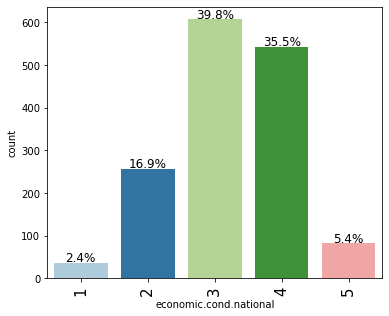

In [475]:
#Observation on economic.cond.national
labeled_barplot(df, "economic.cond.national", perc=True)

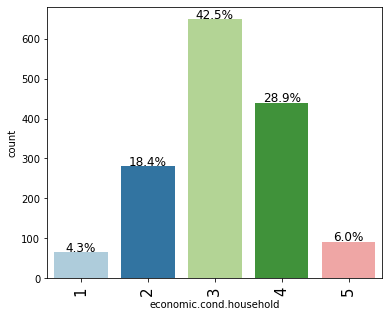

In [476]:
#Observation on economic.cond.household 
labeled_barplot(df, "economic.cond.household", perc=True)

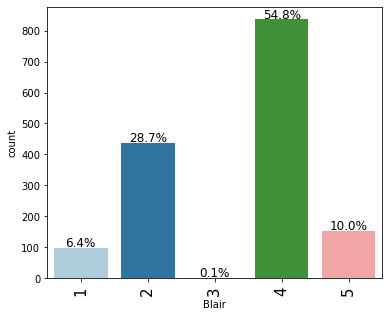

In [477]:
#Observation on Blair 
labeled_barplot(df, "Blair", perc=True)

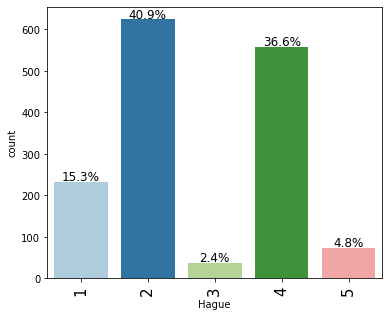

In [478]:
#Observation on Hague 
labeled_barplot(df, "Hague", perc=True)

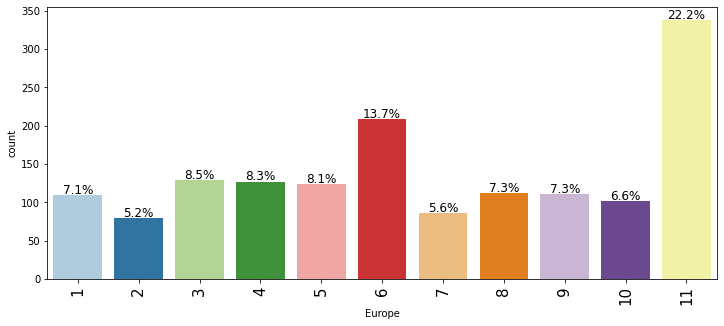

In [479]:
#Observation on Europe 
labeled_barplot(df, "Europe", perc=True)

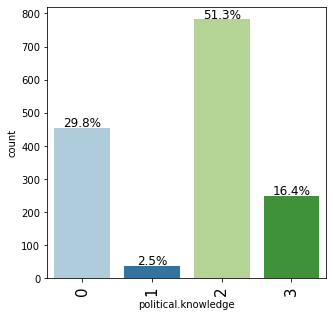

In [480]:
#Observation on political.knowledge 
labeled_barplot(df, "political.knowledge", perc=True)

### Bivariate Analysis

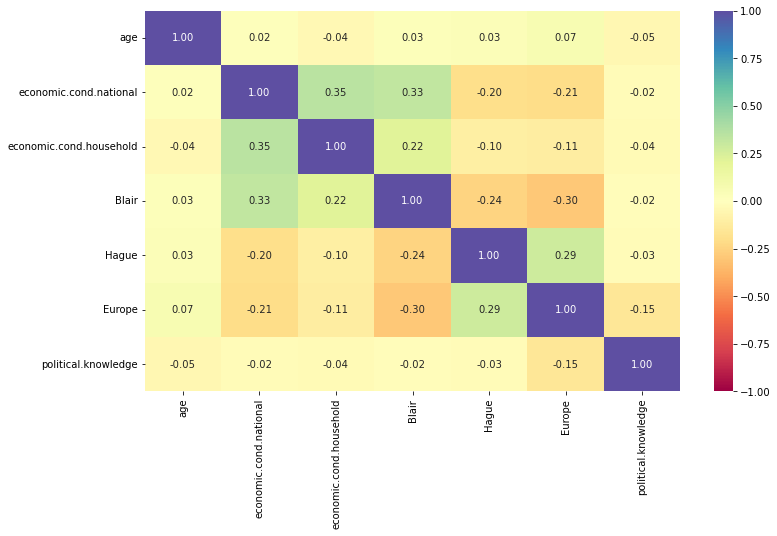

In [481]:
cols_list = df.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(12, 7))
sns.heatmap(
    df[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

In [482]:
### function to plot distributions wrt target


def distribution_plot_wrt_target(df, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = df[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=df[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=df[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=df, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=df,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

In [483]:
def stacked_barplot(df, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = df[predictor].nunique()
    sorter = df[target].value_counts().index[-1]
    tab1 = pd.crosstab(df[predictor], df[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(df[predictor], df[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

vote                    Conservative  Labour   All
economic.cond.national                            
All                              462    1063  1525
3                                200     407   607
2                                140     117   257
4                                 92     450   542
1                                 21      16    37
5                                  9      73    82
------------------------------------------------------------------------------------------------------------------------


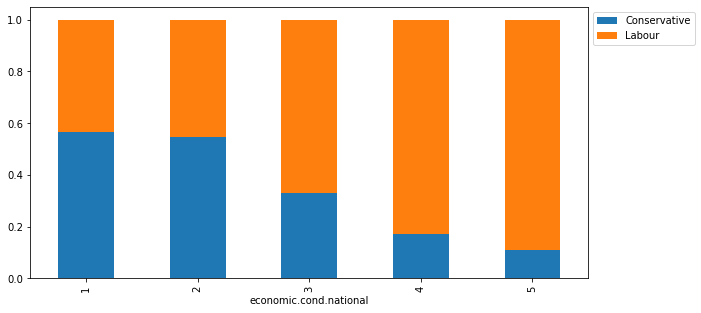

In [484]:
stacked_barplot(df, "economic.cond.national", "vote")

vote                     Conservative  Labour   All
economic.cond.household                            
All                               462    1063  1525
3                                 198     450   648
2                                 126     154   280
4                                  87     353   440
1                                  28      37    65
5                                  23      69    92
------------------------------------------------------------------------------------------------------------------------


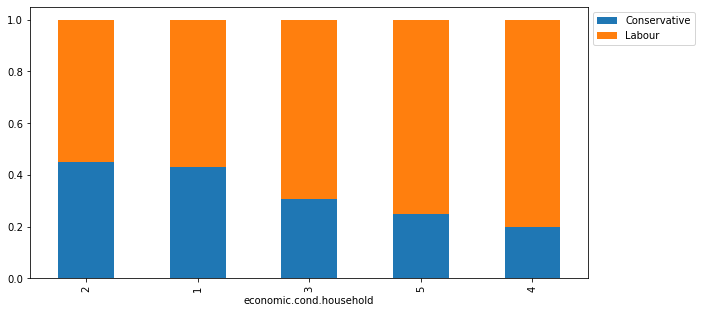

In [485]:
stacked_barplot(df, "economic.cond.household", "vote")

vote   Conservative  Labour   All
Blair                            
All             462    1063  1525
2               242     196   438
4               157     679   836
1                59      38    97
5                 3     150   153
3                 1       0     1
------------------------------------------------------------------------------------------------------------------------


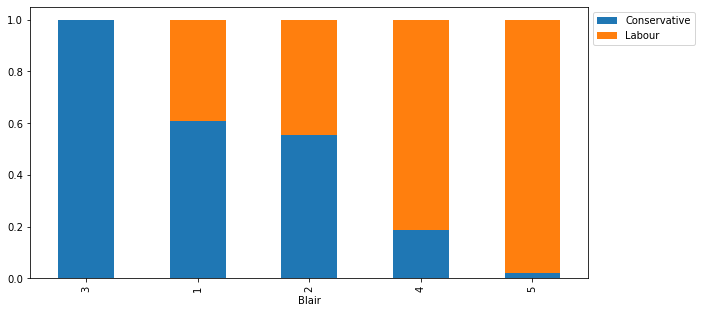

In [486]:
stacked_barplot(df, "Blair", "vote")

vote   Conservative  Labour   All
Hague                            
All             462    1063  1525
4               287     271   558
2                96     528   624
5                59      14    73
1                11     222   233
3                 9      28    37
------------------------------------------------------------------------------------------------------------------------


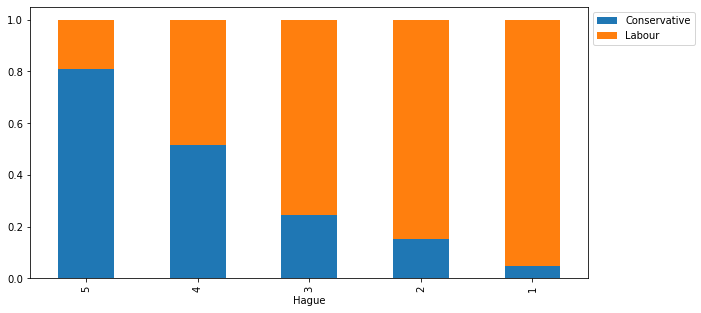

In [487]:
stacked_barplot(df, "Hague", "vote")

vote    Conservative  Labour   All
Europe                            
All              462    1063  1525
11               172     166   338
9                 56      55   111
10                54      47   101
8                 49      63   112
6                 36     173   209
7                 32      54    86
5                 20     104   124
4                 18     109   127
3                 14     115   129
2                  6      73    79
1                  5     104   109
------------------------------------------------------------------------------------------------------------------------


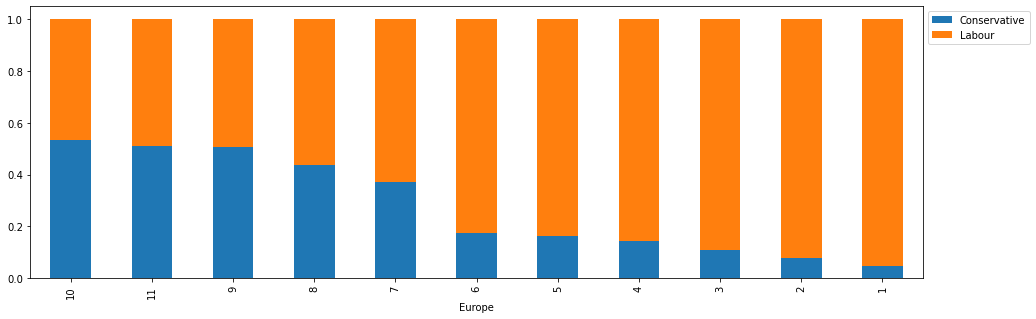

In [488]:
stacked_barplot(df, "Europe", "vote")

vote                 Conservative  Labour   All
political.knowledge                            
All                           462    1063  1525
2                             284     498   782
0                              95     360   455
3                              72     178   250
1                              11      27    38
------------------------------------------------------------------------------------------------------------------------


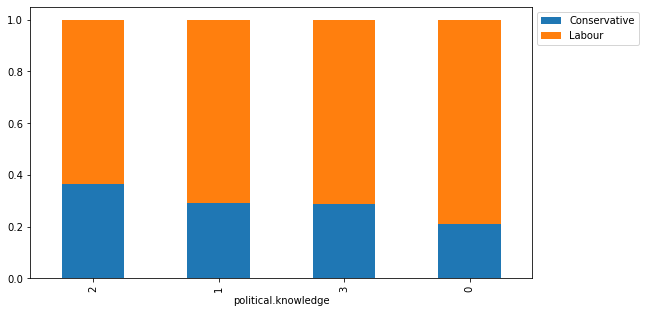

In [489]:
stacked_barplot(df, "political.knowledge", "vote")

vote    Conservative  Labour   All
gender                            
All              462    1063  1525
female           259     553   812
male             203     510   713
------------------------------------------------------------------------------------------------------------------------


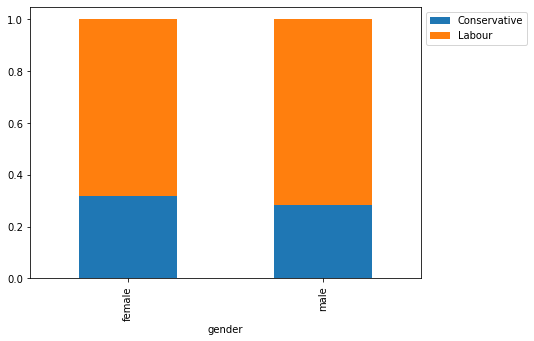

In [490]:
stacked_barplot(df, "gender", "vote")

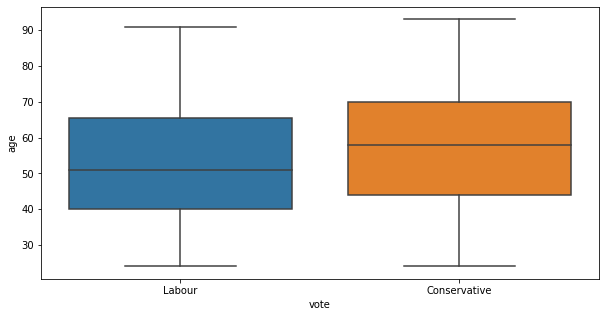

In [491]:
plt.figure(figsize=(10, 5))
sns.boxplot(df["vote"], df["age"])
plt.show()

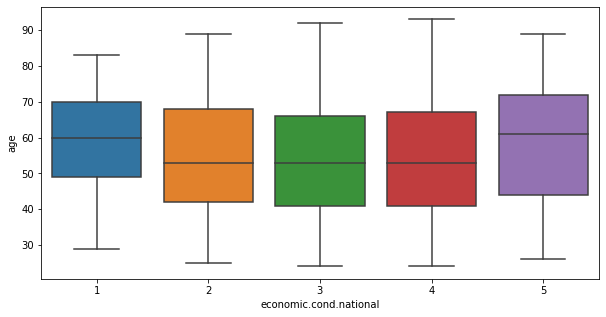

In [492]:
plt.figure(figsize=(10, 5))
sns.boxplot(df["economic.cond.national"], df["age"])
plt.show()

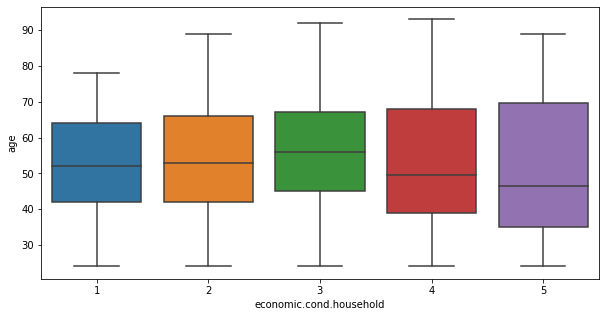

In [493]:
plt.figure(figsize=(10, 5))
sns.boxplot(df["economic.cond.household"], df["age"])
plt.show()

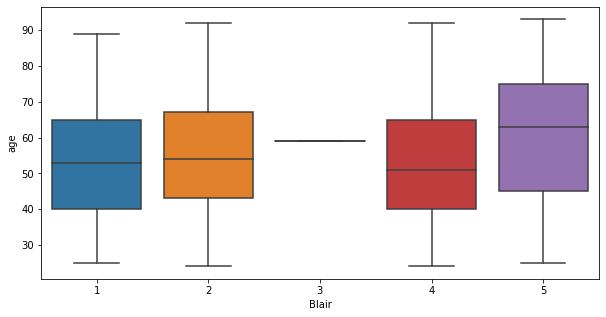

In [494]:
plt.figure(figsize=(10, 5))
sns.boxplot(df["Blair"], df["age"])
plt.show()

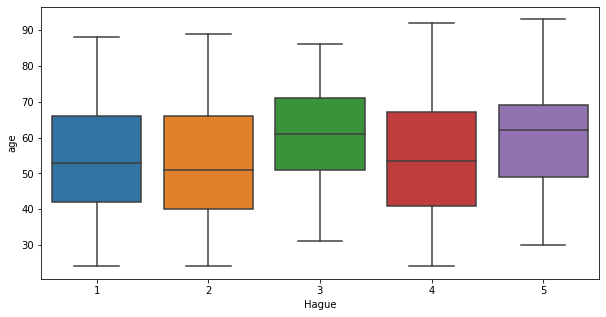

In [495]:
plt.figure(figsize=(10, 5))
sns.boxplot(df["Hague"], df["age"])
plt.show()

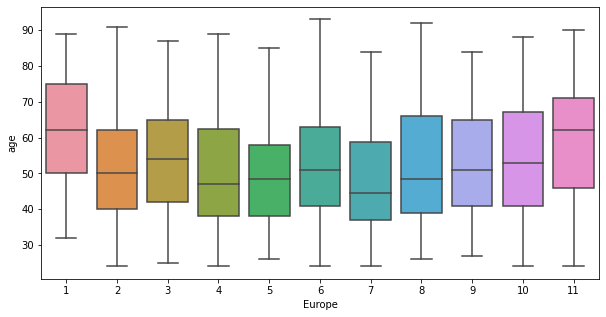

In [496]:
plt.figure(figsize=(10, 5))
sns.boxplot(df["Europe"], df["age"])
plt.show()

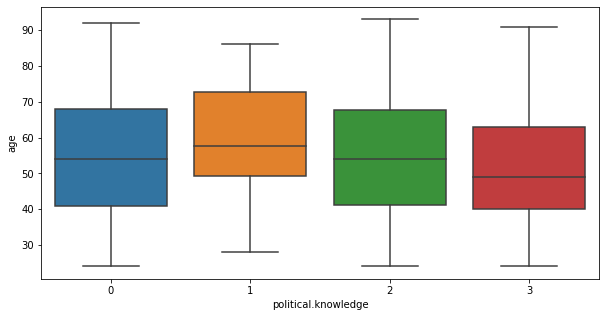

In [497]:
plt.figure(figsize=(10, 5))
sns.boxplot(df["political.knowledge"], df["age"])
plt.show()

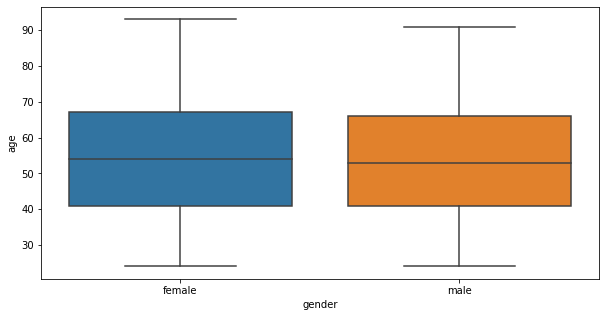

In [498]:
plt.figure(figsize=(10, 5))
sns.boxplot(df["gender"], df["age"])
plt.show()

gender               female  male   All
political.knowledge                    
All                     812   713  1525
2                       422   360   782
0                       282   173   455
3                        85   165   250
1                        23    15    38
------------------------------------------------------------------------------------------------------------------------


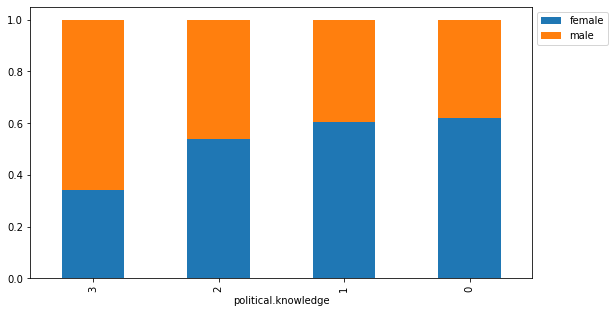

In [499]:
stacked_barplot(df, "political.knowledge", "gender")

gender  female  male   All
Europe                    
All        812   713  1525
11         192   146   338
6          130    79   209
3           58    71   129
4           64    63   127
5           62    62   124
1           50    59   109
9           53    58   111
8           58    54   112
2           32    47    79
10          60    41   101
7           53    33    86
------------------------------------------------------------------------------------------------------------------------


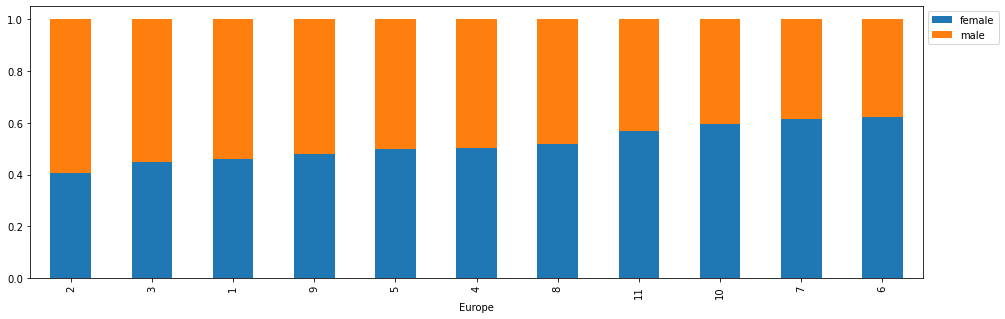

In [500]:
stacked_barplot(df, "Europe", "gender")

gender  female  male   All
Hague                     
All        812   713  1525
2          332   292   624
4          310   248   558
1          112   121   233
5           34    39    73
3           24    13    37
------------------------------------------------------------------------------------------------------------------------


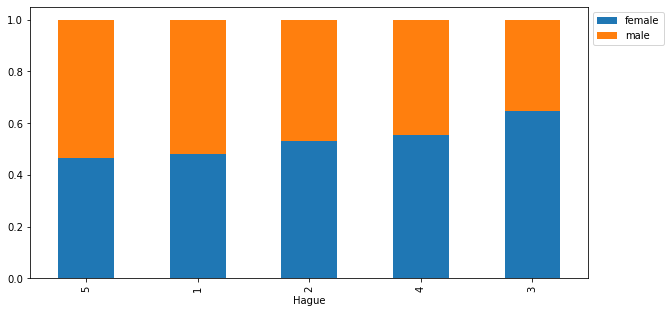

In [501]:
stacked_barplot(df, "Hague", "gender")

gender  female  male   All
Blair                     
All        812   713  1525
4          433   403   836
2          258   180   438
5           69    84   153
1           52    45    97
3            0     1     1
------------------------------------------------------------------------------------------------------------------------


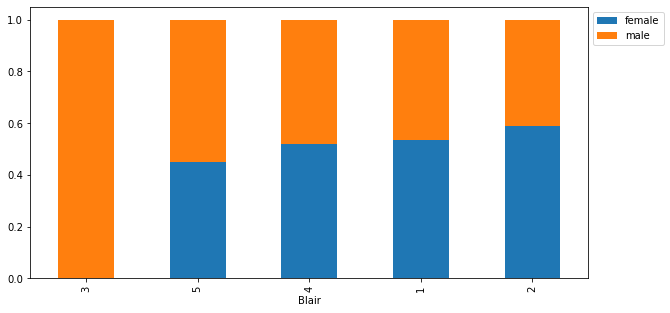

In [502]:
stacked_barplot(df, "Blair", "gender")

gender                   female  male   All
economic.cond.household                    
All                         812   713  1525
3                           350   298   648
4                           227   213   440
2                           153   127   280
5                            45    47    92
1                            37    28    65
------------------------------------------------------------------------------------------------------------------------


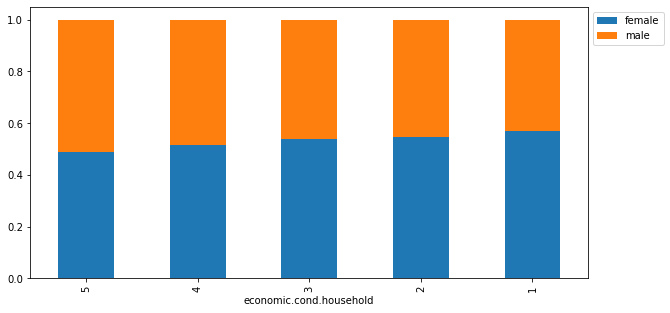

In [503]:
stacked_barplot(df, "economic.cond.household", "gender")

gender                  female  male   All
economic.cond.national                    
All                        812   713  1525
4                          273   269   542
3                          341   266   607
2                          138   119   257
5                           37    45    82
1                           23    14    37
------------------------------------------------------------------------------------------------------------------------


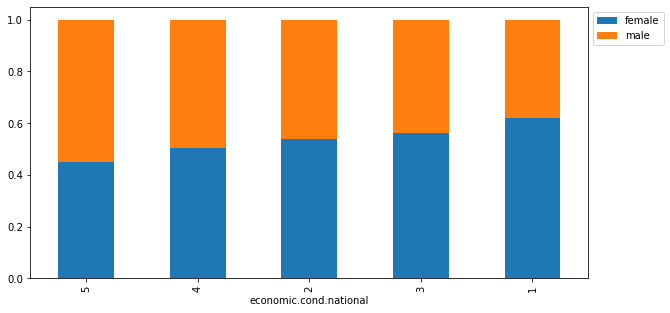

In [504]:
stacked_barplot(df, "economic.cond.national", "gender")

## 2) Data Pre-processing

### Outlier Check

- Let's check for outliers in the data.

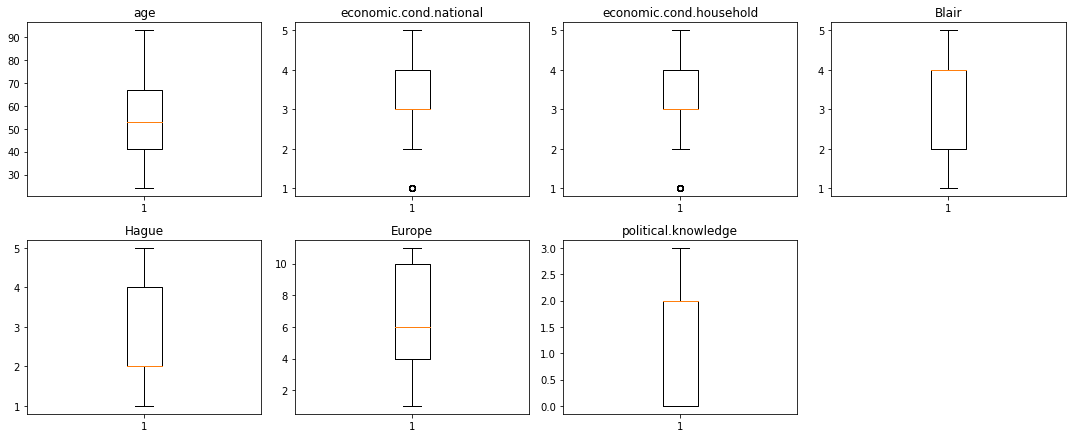

In [505]:
# outlier detection using boxplot
numeric_columns = df.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(15, 12))

for i, variable in enumerate(numeric_columns):
    plt.subplot(4, 4, i + 1)
    plt.boxplot(df[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

In [506]:
data.groupby(["vote"]).count()

,Unnamed: 0,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
vote,,,,,,,,,
Conservative,462,462,462,462,462,462,462,462,462
Labour,1063,1063,1063,1063,1063,1063,1063,1063,1063


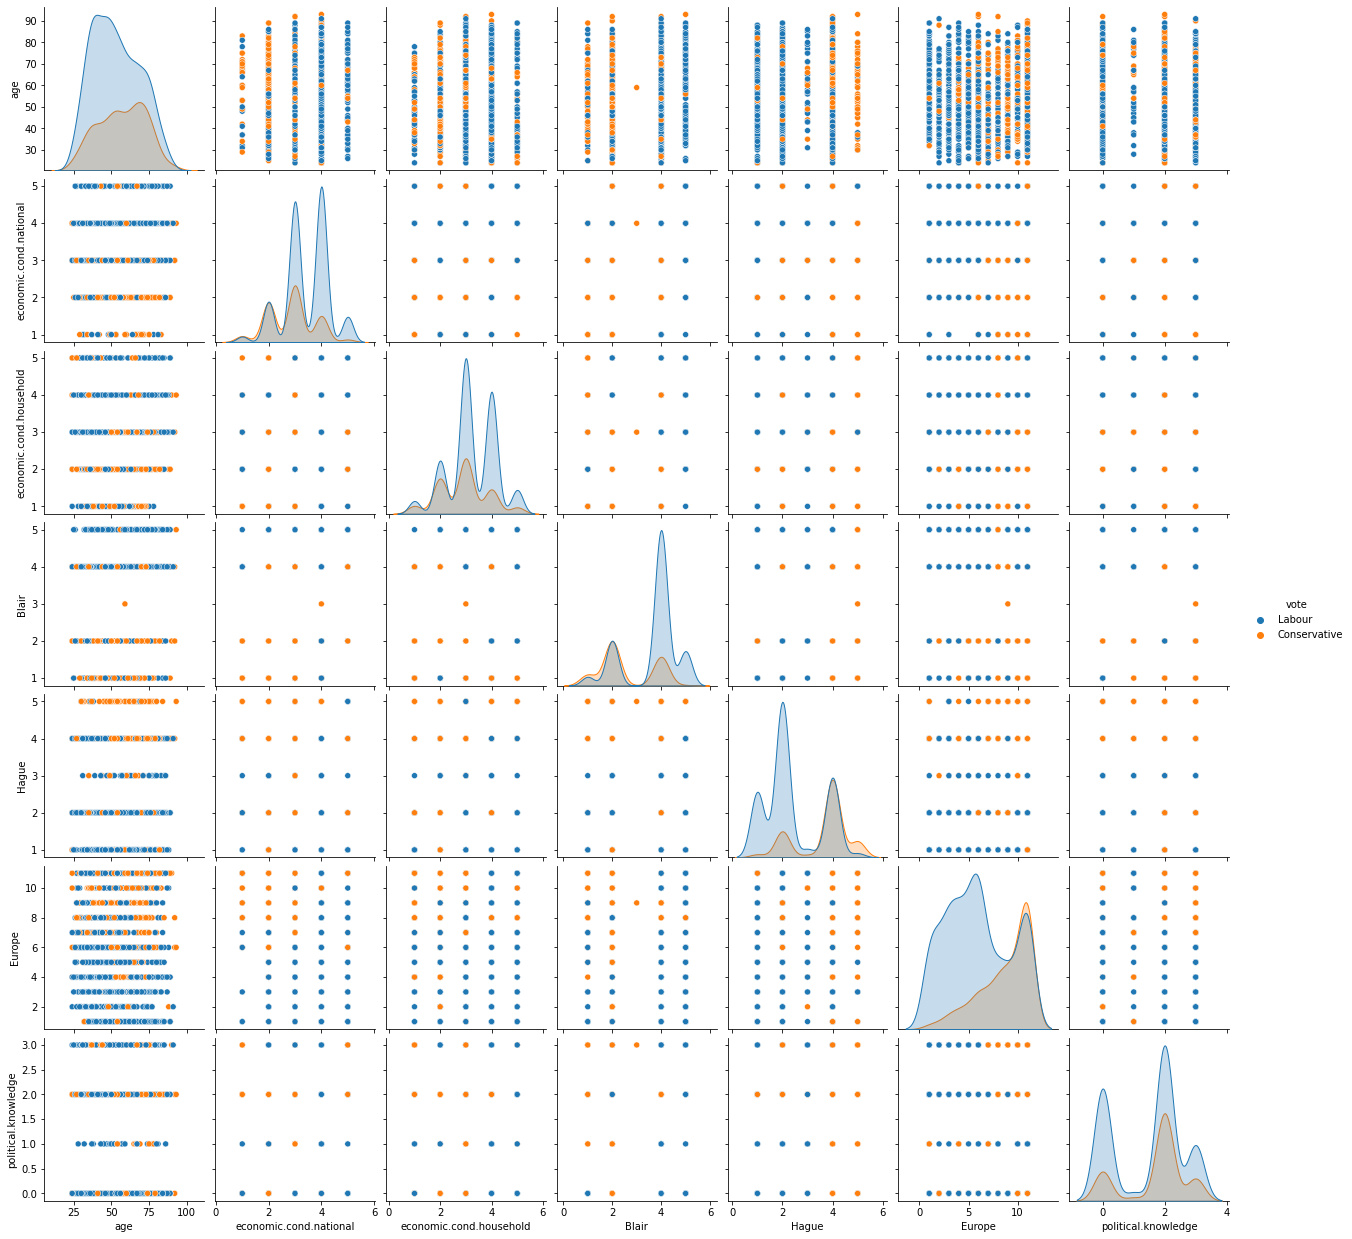

In [507]:
sns.pairplot(df, hue='vote', diag_kind='kde')

In [508]:
print(df.vote.value_counts())
print(df["economic.cond.national"].value_counts())
print(df["economic.cond.household"].value_counts())
print(df.Blair.value_counts())
print(df.Hague.value_counts())
print(df.Europe.value_counts())
print(df["political.knowledge"].value_counts())
print(df.gender.value_counts())

Labour          1063
Conservative     462
Name: vote, dtype: int64
3    607
4    542
2    257
5     82
1     37
Name: economic.cond.national, dtype: int64
3    648
4    440
2    280
5     92
1     65
Name: economic.cond.household, dtype: int64
4    836
2    438
5    153
1     97
3      1
Name: Blair, dtype: int64
2    624
4    558
1    233
5     73
3     37
Name: Hague, dtype: int64
11    338
6     209
3     129
4     127
5     124
8     112
9     111
1     109
10    101
7      86
2      79
Name: Europe, dtype: int64
2    782
0    455
3    250
1     38
Name: political.knowledge, dtype: int64
female    812
male      713
Name: gender, dtype: int64


In [509]:
#Lets convert the columns with an 'object' datatype into categorical variables
for feature in df.columns: # Loop through all columns in the dataframe
    if df[feature].dtype == 'object': # Only apply for columns with categorical strings
        df[feature] = pd.Categorical(df[feature])# Replace strings with an integer
df.head(10)

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,Labour,43,3,3,4,1,2,2,female
1,Labour,36,4,4,4,4,5,2,male
2,Labour,35,4,4,5,2,3,2,male
3,Labour,24,4,2,2,1,4,0,female
4,Labour,41,2,2,1,1,6,2,male
5,Labour,47,3,4,4,4,4,2,male
6,Labour,57,2,2,4,4,11,2,male
7,Labour,77,3,4,4,1,1,0,male
8,Labour,39,3,3,4,4,11,0,female
9,Labour,70,3,2,5,1,11,2,male


In [510]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   vote                     1525 non-null   category
 1   age                      1525 non-null   int64   
 2   economic.cond.national   1525 non-null   int64   
 3   economic.cond.household  1525 non-null   int64   
 4   Blair                    1525 non-null   int64   
 5   Hague                    1525 non-null   int64   
 6   Europe                   1525 non-null   int64   
 7   political.knowledge      1525 non-null   int64   
 8   gender                   1525 non-null   category
dtypes: category(2), int64(7)
memory usage: 86.7 KB


In [511]:
df['vote'] = df['vote'].map({'Labour': 0, 'Conservative': 1})
df['vote'] = df['vote'].astype(int)
oneHotCols=["gender"]
df=pd.get_dummies(df, columns=oneHotCols, drop_first=True)
df.head(10)

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender_male
0,0,43,3,3,4,1,2,2,0
1,0,36,4,4,4,4,5,2,1
2,0,35,4,4,5,2,3,2,1
3,0,24,4,2,2,1,4,0,0
4,0,41,2,2,1,1,6,2,1
5,0,47,3,4,4,4,4,2,1
6,0,57,2,2,4,4,11,2,1
7,0,77,3,4,4,1,1,0,1
8,0,39,3,3,4,4,11,0,0
9,0,70,3,2,5,1,11,2,1


In [512]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   vote                     1525 non-null   int32
 1   age                      1525 non-null   int64
 2   economic.cond.national   1525 non-null   int64
 3   economic.cond.household  1525 non-null   int64
 4   Blair                    1525 non-null   int64
 5   Hague                    1525 non-null   int64
 6   Europe                   1525 non-null   int64
 7   political.knowledge      1525 non-null   int64
 8   gender_male              1525 non-null   uint8
dtypes: int32(1), int64(7), uint8(1)
memory usage: 91.0 KB


In [513]:
df.describe()

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender_male
count,1525.00000,1525.00000,1525.00000,1525.00000,1525.00000,1525.00000,1525.00000,1525.00000,1525.00000
mean,0.30295,54.18230,3.24590,3.14033,3.33443,2.74689,6.72852,1.54230,0.46754
std,0.45968,15.71121,0.88097,0.92995,1.17482,1.23070,3.29754,1.08331,0.49911
min,0.00000,24.00000,1.00000,1.00000,1.00000,1.00000,1.00000,0.00000,0.00000
25%,0.00000,41.00000,3.00000,3.00000,2.00000,2.00000,4.00000,0.00000,0.00000
50%,0.00000,53.00000,3.00000,3.00000,4.00000,2.00000,6.00000,2.00000,0.00000
75%,1.00000,67.00000,4.00000,4.00000,4.00000,4.00000,10.00000,2.00000,1.00000
max,1.00000,93.00000,5.00000,5.00000,5.00000,5.00000,11.00000,3.00000,1.00000


In [514]:
#Split the data into train and test sets
X = df.drop("vote" , axis=1)
y = df.pop("vote")

In [515]:
XScaled  = X.apply(zscore)  # convert all attributes to Z scale 

#Algorithms that rely on distance calculations between data points, such as K-nearest neighbors (KNN) and
#hierarchical clustering, can be affected by feature scales. 
#Scaling helps ensure that distances are calculated accurately.

XScaled.describe()

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender_male
count,1525.00000,1525.00000,1525.00000,1525.00000,1525.00000,1525.00000,1525.00000,1525.00000
mean,0.00000,0.00000,-0.00000,0.00000,-0.00000,-0.00000,-0.00000,-0.00000
std,1.00033,1.00033,1.00033,1.00033,1.00033,1.00033,1.00033,1.00033
min,-1.92170,-2.55019,-2.30230,-1.98769,-1.41989,-1.73778,-1.42415,-0.93706
25%,-0.83931,-0.27922,-0.15095,-1.13622,-0.60708,-0.82771,-1.42415,-0.93706
50%,-0.07528,-0.27922,-0.15095,0.56672,-0.60708,-0.22100,0.42264,-0.93706
75%,0.81610,0.85627,0.92473,0.56672,1.01854,0.99242,0.42264,1.06717
max,2.47151,1.99175,2.00041,1.41819,1.83135,1.29578,1.34604,1.06717


In [516]:
X_train, X_test, y_train, y_test = train_test_split(XScaled, y, test_size=.30, random_state=1,stratify=y)

In [517]:
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (1067, 8)
Shape of test set :  (458, 8)
Percentage of classes in training set:
0   0.69728
1   0.30272
Name: vote, dtype: float64
Percentage of classes in test set:
0   0.69651
1   0.30349
Name: vote, dtype: float64


In [518]:
df.describe()

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender_male
count,1525.00000,1525.00000,1525.00000,1525.00000,1525.00000,1525.00000,1525.00000,1525.00000
mean,54.18230,3.24590,3.14033,3.33443,2.74689,6.72852,1.54230,0.46754
std,15.71121,0.88097,0.92995,1.17482,1.23070,3.29754,1.08331,0.49911
min,24.00000,1.00000,1.00000,1.00000,1.00000,1.00000,0.00000,0.00000
25%,41.00000,3.00000,3.00000,2.00000,2.00000,4.00000,0.00000,0.00000
50%,53.00000,3.00000,3.00000,4.00000,2.00000,6.00000,2.00000,0.00000
75%,67.00000,4.00000,4.00000,4.00000,4.00000,10.00000,2.00000,1.00000
max,93.00000,5.00000,5.00000,5.00000,5.00000,11.00000,3.00000,1.00000


## 3) Model Building and 4) Model Performance evaluation

**Metrics of Choice - Model evaluation criterion**

Model can make wrong predictions as:
- Model predicts which political party a voter is likely to support but in reality, the voter does not support the predicted political party.
- Model predicts which political party a voter is unlikely to support but in reality, the voter supports the political party.

Which case is more important?
- Both the cases are important in order to get an accurate exit poll result.

How to reduce the losses?
- F1 Score can be used a the metric for evaluation of the model, greater the F1 score higher are the chances of minimizing False Negatives and False Positives.
- In our dataset, the votes tilt heavily towards the Labour party

**First, let's create functions to calculate different metrics and confusion matrix so that we don't have to use the same code repeatedly for each model.**
* The model_performance_classification_sklearn function will be used to check the model performance of models.
* The confusion_matrix_sklearn function will be used to plot the confusion matrix.

In [519]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn


def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [520]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

### KNN Model

In [521]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

KNN_model=KNeighborsClassifier()
KNN_model.fit(X_train,y_train)

KNeighborsClassifier()

In [522]:
import pandas as pd
from sklearn import metrics

# Performance Matrix on train data set
y_train_predict = KNN_model.predict(X_train)
model_score = KNN_model.score(X_train, y_train)

# Classification Report
class_report = metrics.classification_report(y_train, y_train_predict, output_dict=True)

# Extract precision, recall, and f1-score for class 0 and 1 from the classification report
precision_0 = format(class_report['0']['precision'], '.2f').rstrip('0').rstrip('.')
recall_0 = format(class_report['0']['recall'], '.2f').rstrip('0').rstrip('.')
f1_score_0 = format(class_report['0']['f1-score'], '.2f').rstrip('0').rstrip('.')

precision_1 = format(class_report['1']['precision'], '.2f').rstrip('0').rstrip('.')
recall_1 = format(class_report['1']['recall'], '.2f').rstrip('0').rstrip('.')
f1_score_1 = format(class_report['1']['f1-score'], '.2f').rstrip('0').rstrip('.')

# Round accuracy score to 2 decimal places and remove trailing zeros
accuracy_score_formatted = format(model_score, '.2f').rstrip('0').rstrip('.')

# Create a DataFrame to store the results
KNN_train_df = pd.DataFrame({
    'Model': ['KNN_model'],
    'Accuracy': [accuracy_score_formatted],
    'Precision_0': [precision_0],
    'Recall_0': [recall_0],
    'F1-Score_0': [f1_score_0],
    'Precision_1': [precision_1],
    'Recall_1': [recall_1],
    'F1-Score_1': [f1_score_1]
})

# Display the DataFrame
print(KNN_train_df)


       Model Accuracy Precision_0 Recall_0 F1-Score_0 Precision_1 Recall_1  \
0  KNN_model     0.85        0.88     0.91       0.89        0.78     0.71   

  F1-Score_1  
0       0.74  


In [386]:
import pandas as pd
from sklearn import metrics

# Performance Matrix on train data set
y_test_predict = KNN_model.predict(X_test)
model_score = KNN_model.score(X_test, y_test)

# Classification Report
class_report = metrics.classification_report(y_test, y_test_predict, output_dict=True)

# Extract precision, recall, and f1-score for class 0 and 1 from the classification report
precision_0 = format(class_report['0']['precision'], '.2f').rstrip('0').rstrip('.')
recall_0 = format(class_report['0']['recall'], '.2f').rstrip('0').rstrip('.')
f1_score_0 = format(class_report['0']['f1-score'], '.2f').rstrip('0').rstrip('.')

precision_1 = format(class_report['1']['precision'], '.2f').rstrip('0').rstrip('.')
recall_1 = format(class_report['1']['recall'], '.2f').rstrip('0').rstrip('.')
f1_score_1 = format(class_report['1']['f1-score'], '.2f').rstrip('0').rstrip('.')

# Round accuracy score to 2 decimal places and remove trailing zeros
accuracy_score_formatted = format(model_score, '.2f').rstrip('0').rstrip('.')

# Create a DataFrame to store the results
KNN_test_df = pd.DataFrame({
    'Model': ['KNN_test_model'],
    'Accuracy': [accuracy_score_formatted],
    'Precision_0': [precision_0],
    'Recall_0': [recall_0],
    'F1-Score_0': [f1_score_0],
    'Precision_1': [precision_1],
    'Recall_1': [recall_1],
    'F1-Score_1': [f1_score_1]
})

# Display the DataFrame
print(KNN_test_df)


            Model Accuracy Precision_0 Recall_0 F1-Score_0 Precision_1  \
0  KNN_test_model     0.83        0.86      0.9       0.88        0.75   

  Recall_1 F1-Score_1  
0     0.68       0.71  


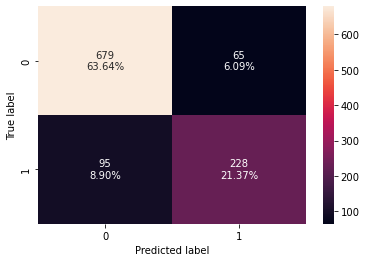

In [387]:
confusion_matrix_sklearn(KNN_model, X_train, y_train) 

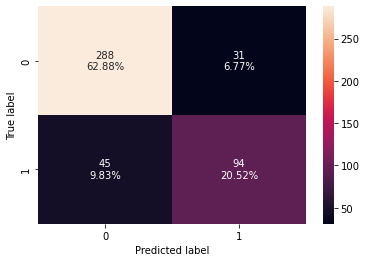

In [388]:
confusion_matrix_sklearn(KNN_model, X_test, y_test) 


Train ROC-AUC score is : 0.9175592563001432

Test ROC-AUC score is : 0.8649782368462595


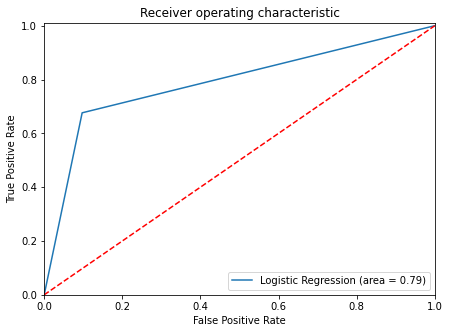

In [389]:
print("\nTrain ROC-AUC score is : {}".format(roc_auc_score(y_train,KNN_model.predict_proba(X_train)[:,1])))

print("\nTest ROC-AUC score is : {}".format(roc_auc_score(y_test,KNN_model.predict_proba(X_test)[:,1])))
logit_roc_auc_test = roc_auc_score(y_test, KNN_model.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, KNN_model.predict(X_test))
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_test)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.01])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

### Naive Bayes Model

In [390]:
from sklearn.naive_bayes import GaussianNB

In [391]:
NB_model = GaussianNB()
NB_model.fit(X_train, y_train)

GaussianNB()

In [392]:
# Performance Matrix on train data set
y_train_predict = NB_model.predict(X_train)
model_score = NB_model.score(X_train, y_train)

# Classification Report
class_report = metrics.classification_report(y_train, y_train_predict, output_dict=True)

# Extract precision, recall, and f1-score for class 0 and 1 from the classification report
precision_0 = format(class_report['0']['precision'], '.2f').rstrip('0').rstrip('.')
recall_0 = format(class_report['0']['recall'], '.2f').rstrip('0').rstrip('.')
f1_score_0 = format(class_report['0']['f1-score'], '.2f').rstrip('0').rstrip('.')

precision_1 = format(class_report['1']['precision'], '.2f').rstrip('0').rstrip('.')
recall_1 = format(class_report['1']['recall'], '.2f').rstrip('0').rstrip('.')
f1_score_1 = format(class_report['1']['f1-score'], '.2f').rstrip('0').rstrip('.')

# Round accuracy score to 2 decimal places and remove trailing zeros
accuracy_score_formatted = format(model_score, '.2f').rstrip('0').rstrip('.')

# Create a DataFrame to store the results
NB_train_df = pd.DataFrame({
    'Model': ['NB_train_model'],
    'Accuracy': [accuracy_score_formatted],
    'Precision_0': [precision_0],
    'Recall_0': [recall_0],
    'F1-Score_0': [f1_score_0],
    'Precision_1': [precision_1],
    'Recall_1': [recall_1],
    'F1-Score_1': [f1_score_1]
})

# Display the DataFrame
print(NB_train_df)

            Model Accuracy Precision_0 Recall_0 F1-Score_0 Precision_1  \
0  NB_train_model     0.82        0.87     0.88       0.87        0.71   

  Recall_1 F1-Score_1  
0     0.69        0.7  


In [393]:
y_test.value_counts()

0    319
1    139
Name: vote, dtype: int64

In [394]:
# Performance Matrix on train data set
y_test_predict = NB_model.predict(X_test)
model_score = NB_model.score(X_test, y_test)

# Classification Report
class_report = metrics.classification_report(y_test, y_test_predict, output_dict=True)

# Extract precision, recall, and f1-score for class 0 and 1 from the classification report
precision_0 = format(class_report['0']['precision'], '.2f').rstrip('0').rstrip('.')
recall_0 = format(class_report['0']['recall'], '.2f').rstrip('0').rstrip('.')
f1_score_0 = format(class_report['0']['f1-score'], '.2f').rstrip('0').rstrip('.')

precision_1 = format(class_report['1']['precision'], '.2f').rstrip('0').rstrip('.')
recall_1 = format(class_report['1']['recall'], '.2f').rstrip('0').rstrip('.')
f1_score_1 = format(class_report['1']['f1-score'], '.2f').rstrip('0').rstrip('.')

# Round accuracy score to 2 decimal places and remove trailing zeros
accuracy_score_formatted = format(model_score, '.2f').rstrip('0').rstrip('.')

# Create a DataFrame to store the results
NB_test_df = pd.DataFrame({
    'Model': ['NB_test_model'],
    'Accuracy': [accuracy_score_formatted],
    'Precision_0': [precision_0],
    'Recall_0': [recall_0],
    'F1-Score_0': [f1_score_0],
    'Precision_1': [precision_1],
    'Recall_1': [recall_1],
    'F1-Score_1': [f1_score_1]
})

# Display the DataFrame
print(NB_test_df)

           Model Accuracy Precision_0 Recall_0 F1-Score_0 Precision_1  \
0  NB_test_model     0.86        0.89     0.92        0.9        0.79   

  Recall_1 F1-Score_1  
0     0.73       0.76  


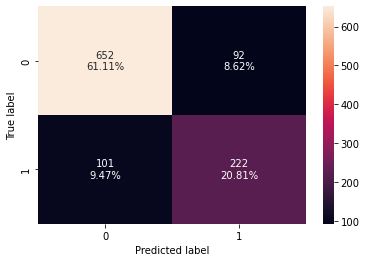

In [395]:
confusion_matrix_sklearn(NB_model, X_train, y_train) 

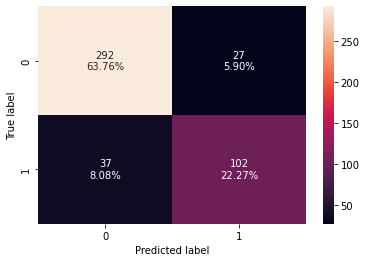

In [396]:
confusion_matrix_sklearn(NB_model, X_test, y_test) 


Train ROC-AUC score is : 0.8751851759379474

Test ROC-AUC score is : 0.9102185336370403


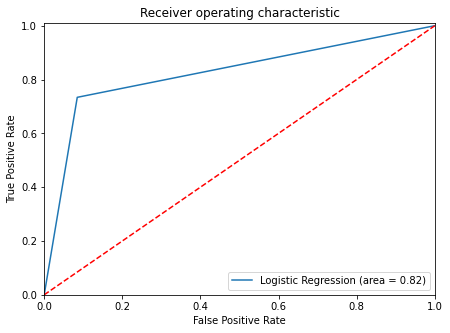

In [397]:
print("\nTrain ROC-AUC score is : {}".format(roc_auc_score(y_train,NB_model.predict_proba(X_train)[:,1])))

print("\nTest ROC-AUC score is : {}".format(roc_auc_score(y_test,NB_model.predict_proba(X_test)[:,1])))
logit_roc_auc_test = roc_auc_score(y_test, NB_model.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, NB_model.predict(X_test))
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_test)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.01])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

### Bagging 

In [398]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
cart = DecisionTreeClassifier()
Bagging_model=BaggingClassifier(base_estimator=cart,n_estimators=100,random_state=1)
Bagging_model.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=100,
                  random_state=1)

In [399]:
# Performance Matrix on train data set
y_train_predict = Bagging_model.predict(X_train)
model_score = Bagging_model.score(X_train, y_train)
# Classification Report
class_report = metrics.classification_report(y_train, y_train_predict, output_dict=True)

# Extract precision, recall, and f1-score for class 0 and 1 from the classification report
precision_0 = format(class_report['0']['precision'], '.2f').rstrip('0').rstrip('.')
recall_0 = format(class_report['0']['recall'], '.2f').rstrip('0').rstrip('.')
f1_score_0 = format(class_report['0']['f1-score'], '.2f').rstrip('0').rstrip('.')

precision_1 = format(class_report['1']['precision'], '.2f').rstrip('0').rstrip('.')
recall_1 = format(class_report['1']['recall'], '.2f').rstrip('0').rstrip('.')
f1_score_1 = format(class_report['1']['f1-score'], '.2f').rstrip('0').rstrip('.')

# Round accuracy score to 2 decimal places and remove trailing zeros
accuracy_score_formatted = format(model_score, '.2f').rstrip('0').rstrip('.')

# Create a DataFrame to store the results
Bagging_train_df = pd.DataFrame({
    'Model': ['Bagging_train_model'],
    'Accuracy': [accuracy_score_formatted],
    'Precision_0': [precision_0],
    'Recall_0': [recall_0],
    'F1-Score_0': [f1_score_0],
    'Precision_1': [precision_1],
    'Recall_1': [recall_1],
    'F1-Score_1': [f1_score_1]
})

# Display the DataFrame
print(Bagging_train_df)

                 Model Accuracy Precision_0 Recall_0 F1-Score_0 Precision_1  \
0  Bagging_train_model        1           1        1          1           1   

  Recall_1 F1-Score_1  
0        1          1  


In [400]:
# Performance Matrix on test data set
y_test_predict = Bagging_model.predict(X_test)
model_score = Bagging_model.score(X_test, y_test)

# Classification Report
class_report = metrics.classification_report(y_test, y_test_predict, output_dict=True)

# Extract precision, recall, and f1-score for class 0 and 1 from the classification report
precision_0 = format(class_report['0']['precision'], '.2f').rstrip('0').rstrip('.')
recall_0 = format(class_report['0']['recall'], '.2f').rstrip('0').rstrip('.')
f1_score_0 = format(class_report['0']['f1-score'], '.2f').rstrip('0').rstrip('.')

precision_1 = format(class_report['1']['precision'], '.2f').rstrip('0').rstrip('.')
recall_1 = format(class_report['1']['recall'], '.2f').rstrip('0').rstrip('.')
f1_score_1 = format(class_report['1']['f1-score'], '.2f').rstrip('0').rstrip('.')

# Round accuracy score to 2 decimal places and remove trailing zeros
accuracy_score_formatted = format(model_score, '.2f').rstrip('0').rstrip('.')

# Create a DataFrame to store the results
Bagging_test_df = pd.DataFrame({
    'Model': ['Bagging_test_model'],
    'Accuracy': [accuracy_score_formatted],
    'Precision_0': [precision_0],
    'Recall_0': [recall_0],
    'F1-Score_0': [f1_score_0],
    'Precision_1': [precision_1],
    'Recall_1': [recall_1],
    'F1-Score_1': [f1_score_1]
})

# Display the DataFrame
print(Bagging_test_df)

                Model Accuracy Precision_0 Recall_0 F1-Score_0 Precision_1  \
0  Bagging_test_model     0.83        0.87      0.9       0.88        0.75   

  Recall_1 F1-Score_1  
0     0.68       0.71  


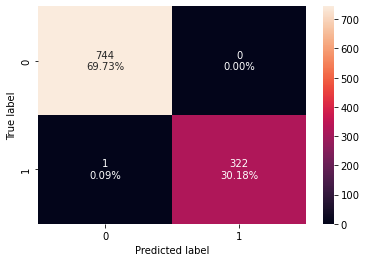

In [401]:
confusion_matrix_sklearn(Bagging_model, X_train, y_train) 

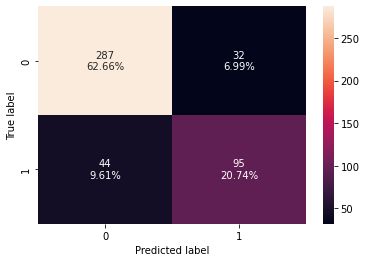

In [402]:
confusion_matrix_sklearn(Bagging_model, X_test, y_test) 


Train ROC-AUC score is : 0.9999895968574187

Test ROC-AUC score is : 0.8951534697007284


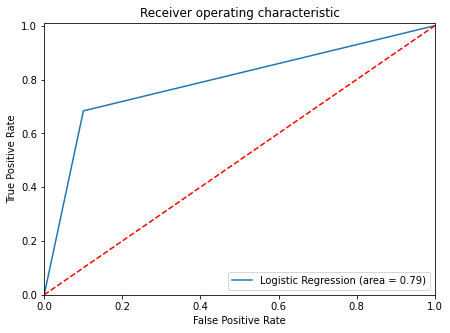

In [403]:
print("\nTrain ROC-AUC score is : {}".format(roc_auc_score(y_train,Bagging_model.predict_proba(X_train)[:,1])))

print("\nTest ROC-AUC score is : {}".format(roc_auc_score(y_test,Bagging_model.predict_proba(X_test)[:,1])))
logit_roc_auc_test = roc_auc_score(y_test, Bagging_model.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, Bagging_model.predict(X_test))
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_test)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.01])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

## Boosting

In [404]:
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier

We are going to build 3 ensemble models here - AdaBoost Classifier, Gradient Boosting Classifier and XGBoost Classifier.

First, let's build these models with default parameters and then use hyperparameter tuning to optimize the model performance.

We will calculate all three metrics - Accuracy, Precision and Recall but the metric of interest here is recall.

Recall - It gives the ratio of True positives to Actual positives, so high Recall implies low false negatives, i.e. low chances of predicting a defaulter as non defaulter

### (A) AdaBoost Classifier

In [405]:
abc = AdaBoostClassifier(random_state=1)
abc.fit(X_train,y_train)

AdaBoostClassifier(random_state=1)

In [406]:
# Performance Matrix on train data set
y_train_predict = abc.predict(X_train)
model_score = abc.score(X_train, y_train)

# Classification Report
class_report = metrics.classification_report(y_train, y_train_predict, output_dict=True)

# Extract precision, recall, and f1-score for class 0 and 1 from the classification report
precision_0 = format(class_report['0']['precision'], '.2f').rstrip('0').rstrip('.')
recall_0 = format(class_report['0']['recall'], '.2f').rstrip('0').rstrip('.')
f1_score_0 = format(class_report['0']['f1-score'], '.2f').rstrip('0').rstrip('.')

precision_1 = format(class_report['1']['precision'], '.2f').rstrip('0').rstrip('.')
recall_1 = format(class_report['1']['recall'], '.2f').rstrip('0').rstrip('.')
f1_score_1 = format(class_report['1']['f1-score'], '.2f').rstrip('0').rstrip('.')

# Round accuracy score to 2 decimal places and remove trailing zeros
accuracy_score_formatted = format(model_score, '.2f').rstrip('0').rstrip('.')

# Create a DataFrame to store the results
abc_train_df = pd.DataFrame({
    'Model': ['abc_train_model'],
    'Accuracy': [accuracy_score_formatted],
    'Precision_0': [precision_0],
    'Recall_0': [recall_0],
    'F1-Score_0': [f1_score_0],
    'Precision_1': [precision_1],
    'Recall_1': [recall_1],
    'F1-Score_1': [f1_score_1]
})

# Display the DataFrame
print(abc_train_df)

             Model Accuracy Precision_0 Recall_0 F1-Score_0 Precision_1  \
0  abc_train_model     0.84        0.87     0.91       0.89        0.76   

  Recall_1 F1-Score_1  
0     0.67       0.72  


In [407]:
# Performance Matrix on test data set
y_test_predict = abc.predict(X_test)
model_score = abc.score(X_test, y_test)

# Classification Report
class_report = metrics.classification_report(y_test, y_test_predict, output_dict=True)

# Extract precision, recall, and f1-score for class 0 and 1 from the classification report
precision_0 = format(class_report['0']['precision'], '.2f').rstrip('0').rstrip('.')
recall_0 = format(class_report['0']['recall'], '.2f').rstrip('0').rstrip('.')
f1_score_0 = format(class_report['0']['f1-score'], '.2f').rstrip('0').rstrip('.')

precision_1 = format(class_report['1']['precision'], '.2f').rstrip('0').rstrip('.')
recall_1 = format(class_report['1']['recall'], '.2f').rstrip('0').rstrip('.')
f1_score_1 = format(class_report['1']['f1-score'], '.2f').rstrip('0').rstrip('.')

# Round accuracy score to 2 decimal places and remove trailing zeros
accuracy_score_formatted = format(model_score, '.2f').rstrip('0').rstrip('.')

# Create a DataFrame to store the results
abc_test_df = pd.DataFrame({
    'Model': ['abc_test_model'],
    'Accuracy': [accuracy_score_formatted],
    'Precision_0': [precision_0],
    'Recall_0': [recall_0],
    'F1-Score_0': [f1_score_0],
    'Precision_1': [precision_1],
    'Recall_1': [recall_1],
    'F1-Score_1': [f1_score_1]
})

# Display the DataFrame
print(abc_test_df)

            Model Accuracy Precision_0 Recall_0 F1-Score_0 Precision_1  \
0  abc_test_model     0.86        0.86     0.94        0.9        0.84   

  Recall_1 F1-Score_1  
0     0.66       0.74  


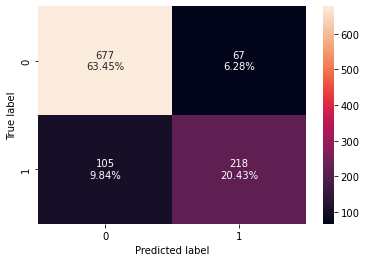

In [408]:
confusion_matrix_sklearn(abc, X_train, y_train) 

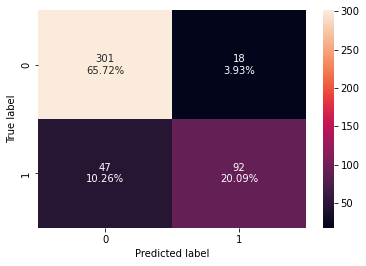

In [409]:
confusion_matrix_sklearn(abc, X_test, y_test) 


Train ROC-AUC score is : 0.8987815839408769

Test ROC-AUC score is : 0.9105793734918022


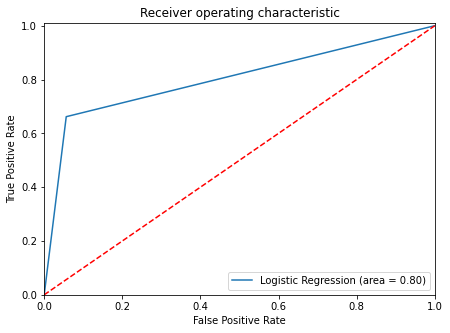

In [410]:
print("\nTrain ROC-AUC score is : {}".format(roc_auc_score(y_train,abc.predict_proba(X_train)[:,1])))

print("\nTest ROC-AUC score is : {}".format(roc_auc_score(y_test,abc.predict_proba(X_test)[:,1])))
logit_roc_auc_test = roc_auc_score(y_test, abc.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, abc.predict(X_test))
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_test)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.01])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

### (B) Gradient Boosting Classifier

In [411]:
gbc = GradientBoostingClassifier(random_state=1)
gbc.fit(X_train,y_train)

GradientBoostingClassifier(random_state=1)

In [412]:
# Performance Matrix on train data set
y_train_predict = gbc.predict(X_train)
model_score = gbc.score(X_train, y_train)

# Classification Report
class_report = metrics.classification_report(y_train, y_train_predict, output_dict=True)

# Extract precision, recall, and f1-score for class 0 and 1 from the classification report
precision_0 = format(class_report['0']['precision'], '.2f').rstrip('0').rstrip('.')
recall_0 = format(class_report['0']['recall'], '.2f').rstrip('0').rstrip('.')
f1_score_0 = format(class_report['0']['f1-score'], '.2f').rstrip('0').rstrip('.')

precision_1 = format(class_report['1']['precision'], '.2f').rstrip('0').rstrip('.')
recall_1 = format(class_report['1']['recall'], '.2f').rstrip('0').rstrip('.')
f1_score_1 = format(class_report['1']['f1-score'], '.2f').rstrip('0').rstrip('.')

# Round accuracy score to 2 decimal places and remove trailing zeros
accuracy_score_formatted = format(model_score, '.2f').rstrip('0').rstrip('.')

# Create a DataFrame to store the results
gbc_train_df = pd.DataFrame({
    'Model': ['gbc_train_model'],
    'Accuracy': [accuracy_score_formatted],
    'Precision_0': [precision_0],
    'Recall_0': [recall_0],
    'F1-Score_0': [f1_score_0],
    'Precision_1': [precision_1],
    'Recall_1': [recall_1],
    'F1-Score_1': [f1_score_1]
})

# Display the DataFrame
print(gbc_train_df)

             Model Accuracy Precision_0 Recall_0 F1-Score_0 Precision_1  \
0  gbc_train_model     0.87        0.89     0.93       0.91        0.82   

  Recall_1 F1-Score_1  
0     0.73       0.77  


In [413]:
# Performance Matrix on test data set
y_test_predict = gbc.predict(X_test)
model_score = gbc.score(X_test, y_test)

# Classification Report
class_report = metrics.classification_report(y_test, y_test_predict, output_dict=True)

# Extract precision, recall, and f1-score for class 0 and 1 from the classification report
precision_0 = format(class_report['0']['precision'], '.2f').rstrip('0').rstrip('.')
recall_0 = format(class_report['0']['recall'], '.2f').rstrip('0').rstrip('.')
f1_score_0 = format(class_report['0']['f1-score'], '.2f').rstrip('0').rstrip('.')

precision_1 = format(class_report['1']['precision'], '.2f').rstrip('0').rstrip('.')
recall_1 = format(class_report['1']['recall'], '.2f').rstrip('0').rstrip('.')
f1_score_1 = format(class_report['1']['f1-score'], '.2f').rstrip('0').rstrip('.')

# Round accuracy score to 2 decimal places and remove trailing zeros
accuracy_score_formatted = format(model_score, '.2f').rstrip('0').rstrip('.')

# Create a DataFrame to store the results
gbc_test_df = pd.DataFrame({
    'Model': ['gbc_test_model'],
    'Accuracy': [accuracy_score_formatted],
    'Precision_0': [precision_0],
    'Recall_0': [recall_0],
    'F1-Score_0': [f1_score_0],
    'Precision_1': [precision_1],
    'Recall_1': [recall_1],
    'F1-Score_1': [f1_score_1]
})

# Display the DataFrame
print(gbc_test_df)

            Model Accuracy Precision_0 Recall_0 F1-Score_0 Precision_1  \
0  gbc_test_model     0.87        0.88     0.94       0.91        0.84   

  Recall_1 F1-Score_1  
0      0.7       0.76  


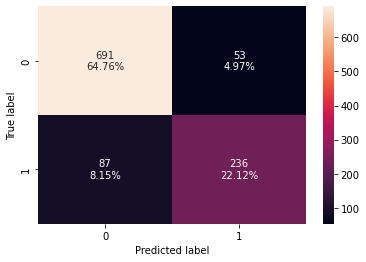

In [414]:
confusion_matrix_sklearn(gbc, X_train, y_train) 

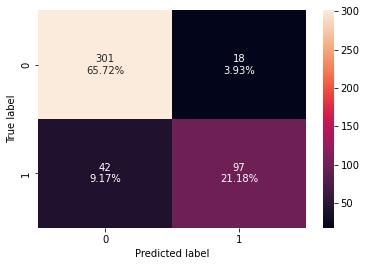

In [415]:
confusion_matrix_sklearn(gbc, X_test, y_test) 


Train ROC-AUC score is : 0.9424560571257365

Test ROC-AUC score is : 0.9263773933830991


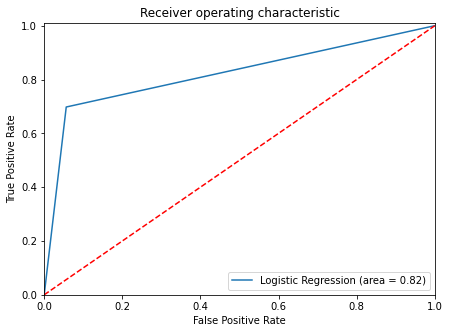

In [416]:
print("\nTrain ROC-AUC score is : {}".format(roc_auc_score(y_train,gbc.predict_proba(X_train)[:,1])))

print("\nTest ROC-AUC score is : {}".format(roc_auc_score(y_test,gbc.predict_proba(X_test)[:,1])))
logit_roc_auc_test = roc_auc_score(y_test, gbc.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, gbc.predict(X_test))
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_test)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.01])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

### (C) XGBoost Classifier

In [417]:
!pip install xgboost 
import xgboost as xgb
from xgboost import XGBClassifier
xgb = XGBClassifier(random_state=1)
xgb.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=1, ...)

In [419]:
# Performance Matrix on train data set
y_train_predict = xgb.predict(X_train)
model_score = xgb.score(X_train, y_train)

# Classification Report
class_report = metrics.classification_report(y_train, y_train_predict, output_dict=True)

# Extract precision, recall, and f1-score for class 0 and 1 from the classification report
precision_0 = format(class_report['0']['precision'], '.3f').rstrip('0').rstrip('.')
recall_0 = format(class_report['0']['recall'], '.3f').rstrip('0').rstrip('.')
f1_score_0 = format(class_report['0']['f1-score'], '.3f').rstrip('0').rstrip('.')

precision_1 = format(class_report['1']['precision'], '.3f').rstrip('0').rstrip('.')
recall_1 = format(class_report['1']['recall'], '.3f').rstrip('0').rstrip('.')
f1_score_1 = format(class_report['1']['f1-score'], '.3f').rstrip('0').rstrip('.')

# Round accuracy score to 2 decimal places and remove trailing zeros
accuracy_score_formatted = format(model_score, '.3f').rstrip('0').rstrip('.')

# Create a DataFrame to store the results
xgb_train_df = pd.DataFrame({
    'Model': ['xgb_train_model'],
    'Accuracy': [accuracy_score_formatted],
    'Precision_0': [precision_0],
    'Recall_0': [recall_0],
    'F1-Score_0': [f1_score_0],
    'Precision_1': [precision_1],
    'Recall_1': [recall_1],
    'F1-Score_1': [f1_score_1]
})

# Display the DataFrame
print(xgb_train_df)

             Model Accuracy Precision_0 Recall_0 F1-Score_0 Precision_1  \
0  xgb_train_model    0.995       0.995    0.999      0.997       0.997   

  Recall_1 F1-Score_1  
0    0.988      0.992  


In [420]:
# Performance Matrix on test data set
y_test_predict = xgb.predict(X_test)
model_score = xgb.score(X_test, y_test)

# Classification Report
class_report = metrics.classification_report(y_test, y_test_predict, output_dict=True)

# Extract precision, recall, and f1-score for class 0 and 1 from the classification report
precision_0 = format(class_report['0']['precision'], '.3f').rstrip('0').rstrip('.')
recall_0 = format(class_report['0']['recall'], '.3f').rstrip('0').rstrip('.')
f1_score_0 = format(class_report['0']['f1-score'], '.3f').rstrip('0').rstrip('.')

precision_1 = format(class_report['1']['precision'], '.3f').rstrip('0').rstrip('.')
recall_1 = format(class_report['1']['recall'], '.3f').rstrip('0').rstrip('.')
f1_score_1 = format(class_report['1']['f1-score'], '.3f').rstrip('0').rstrip('.')

# Round accuracy score to 2 decimal places and remove trailing zeros
accuracy_score_formatted = format(model_score, '.3f').rstrip('0').rstrip('.')

# Create a DataFrame to store the results
xgb_test_df = pd.DataFrame({
    'Model': ['xgb_test_model'],
    'Accuracy': [accuracy_score_formatted],
    'Precision_0': [precision_0],
    'Recall_0': [recall_0],
    'F1-Score_0': [f1_score_0],
    'Precision_1': [precision_1],
    'Recall_1': [recall_1],
    'F1-Score_1': [f1_score_1]
})

# Display the DataFrame
print(xgb_test_df)

            Model Accuracy Precision_0 Recall_0 F1-Score_0 Precision_1  \
0  xgb_test_model    0.849       0.877    0.912      0.894       0.778   

  Recall_1 F1-Score_1  
0    0.705       0.74  


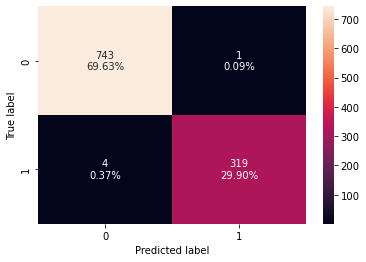

In [421]:
confusion_matrix_sklearn(xgb, X_train, y_train) 

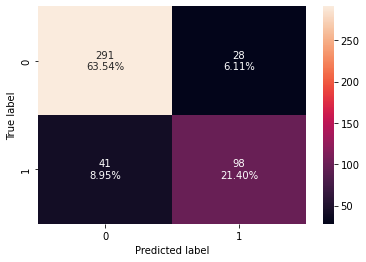

In [422]:
confusion_matrix_sklearn(xgb, X_test, y_test) 


Train ROC-AUC score is : 0.999785695262825

Test ROC-AUC score is : 0.9006111725040031


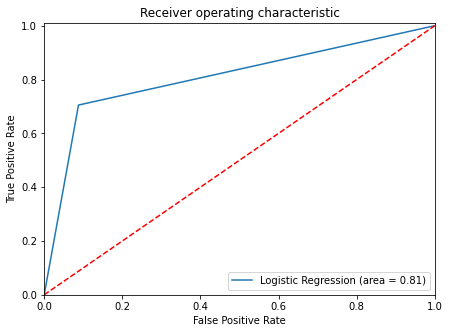

In [423]:
print("\nTrain ROC-AUC score is : {}".format(roc_auc_score(y_train,xgb.predict_proba(X_train)[:,1])))

print("\nTest ROC-AUC score is : {}".format(roc_auc_score(y_test,xgb.predict_proba(X_test)[:,1])))
logit_roc_auc_test = roc_auc_score(y_test, xgb.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, xgb.predict(X_test))
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_test)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.01])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

## 5) Model Performance Improvement 

# Hyperparameter Tuning 

### Bagging Classifier 

In [428]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV

# Load the Iris dataset
XScaled, y = load_iris(return_X_y=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(XScaled, y, test_size=0.3, random_state=1)

# Initialize the base estimator (e.g., DecisionTreeClassifier)
base_estimator = DecisionTreeClassifier()

# Initialize the BaggingClassifier
bagging_clf = BaggingClassifier(base_estimator)

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [10, 50, 100],
    'max_samples': [0.5, 0.7, 1.0],
    'max_features': [0.5, 0.7, 1.0],
}

# Initialize GridSearchCV to search for the best parameters
grid_search = GridSearchCV(bagging_clf, param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Get the best model
tuned_bagging = grid_search.best_estimator_

# Make predictions on the train set using the best model
y_train_pred = tuned_bagging.predict(X_train)

# Classification Report
class_report = classification_report(y_train, y_train_pred, output_dict=True)

# Extract precision, recall, and f1-score for class 0 and 1 from the classification report
precision_0 = format(class_report['0']['precision'], '.3f').rstrip('0').rstrip('.')
recall_0 = format(class_report['0']['recall'], '.3f').rstrip('0').rstrip('.')
f1_score_0 = format(class_report['0']['f1-score'], '.3f').rstrip('0').rstrip('.')

precision_1 = format(class_report['1']['precision'], '.3f').rstrip('0').rstrip('.')
recall_1 = format(class_report['1']['recall'], '.3f').rstrip('0').rstrip('.')
f1_score_1 = format(class_report['1']['f1-score'], '.3f').rstrip('0').rstrip('.')

# Get the accuracy score of the best model
accuracy_score_formatted = format(grid_search.best_score_, '.3f').rstrip('0').rstrip('.')

# Create a DataFrame to store the results
tuned_bagging_train_df = pd.DataFrame({
    'Model': ['tuned_bagging_train_model'],
    'Accuracy': [accuracy_score_formatted],
    'Precision_0': [precision_0],
    'Recall_0': [recall_0],
    'F1-Score_0': [f1_score_0],
    'Precision_1': [precision_1],
    'Recall_1': [recall_1],
    'F1-Score_1': [f1_score_1]
})

# Display the DataFrame
print(tuned_bagging_train_df)


                       Model Accuracy Precision_0 Recall_0 F1-Score_0  \
0  tuned_bagging_train_model    0.962           1        1          1   

  Precision_1 Recall_1 F1-Score_1  
0           1        1          1  


In [429]:

# Fit the grid search to the test data
grid_search.fit(X_test, y_test)

# Get the best model
tuned_bagging = grid_search.best_estimator_

# Make predictions on the train set using the best model
y_test_pred = tuned_bagging.predict(X_test)

# Classification Report
class_report = classification_report(y_test, y_test_pred, output_dict=True)

# Extract precision, recall, and f1-score for class 0 and 1 from the classification report
precision_0 = format(class_report['0']['precision'], '.3f').rstrip('0').rstrip('.')
recall_0 = format(class_report['0']['recall'], '.3f').rstrip('0').rstrip('.')
f1_score_0 = format(class_report['0']['f1-score'], '.3f').rstrip('0').rstrip('.')

precision_1 = format(class_report['1']['precision'], '.3f').rstrip('0').rstrip('.')
recall_1 = format(class_report['1']['recall'], '.3f').rstrip('0').rstrip('.')
f1_score_1 = format(class_report['1']['f1-score'], '.3f').rstrip('0').rstrip('.')

# Get the accuracy score of the best model
accuracy_score_formatted = format(grid_search.best_score_, '.3f').rstrip('0').rstrip('.')

# Create a DataFrame to store the results
tuned_bagging_test_df = pd.DataFrame({
    'Model': ['tuned_bagging_test_model'],
    'Accuracy': [accuracy_score_formatted],
    'Precision_0': [precision_0],
    'Recall_0': [recall_0],
    'F1-Score_0': [f1_score_0],
    'Precision_1': [precision_1],
    'Recall_1': [recall_1],
    'F1-Score_1': [f1_score_1]
})

# Display the DataFrame
print(tuned_bagging_test_df)


                      Model Accuracy Precision_0 Recall_0 F1-Score_0  \
0  tuned_bagging_test_model    0.956           1        1          1   

  Precision_1 Recall_1 F1-Score_1  
0       0.947        1      0.973  


In [431]:
# Plot feature importances if the base estimator supports it
if hasattr(best_model.base_estimator_, 'feature_importances_'):
    feature_importances = best_model.base_estimator_.feature_importances_
    feature_names = iris.feature_names  # Replace with your feature names if applicable

    # Plot feature importances
    plt.figure(figsize=(8, 6))
    plt.barh(feature_names, feature_importances)
    plt.xlabel('Feature Importance')
    plt.ylabel('Feature')
    plt.title('Feature Importances')
    plt.show()

### AdaBoost Classifier

An AdaBoost classifier is a meta-estimator that begins by fitting a classifier on the original dataset and then fits additional copies of the classifier on the same dataset but where the weights of incorrectly classified instances are adjusted such that subsequent classifiers focus more on difficult cases.

Some important hyperparamters are:
- base_estimator: The base estimator from which the boosted ensemble is built. By default the base estimator is a decision tree with max_depth=1
- n_estimators: The maximum number of estimators at which boosting is terminated. Default value is 50.
- learning_rate: Learning rate shrinks the contribution of each classifier by learning_rate. There is a trade-off between learning_rate and n_estimators.

In [432]:
from sklearn.metrics import make_scorer, recall_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier
import numpy as np

# Choose the type of classifier.
abc_tuned = AdaBoostClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    "base_estimator": [DecisionTreeClassifier(max_depth=1), DecisionTreeClassifier(max_depth=2), DecisionTreeClassifier(max_depth=3)],
    "n_estimators": np.arange(10, 110, 10),
    "learning_rate": np.arange(0.1, 2, 0.1)
}

# Specify the scorer with average='macro' for multiclass classification
acc_scorer = make_scorer(recall_score, average='macro')

# Run the grid search
grid_obj = GridSearchCV(abc_tuned, parameters, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
abc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
abc_tuned.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),
                   learning_rate=0.9, n_estimators=30, random_state=1)

In [433]:
# Make predictions on the train set using the best model
y_train_pred = abc_tuned.predict(X_train)

# Classification Report
class_report = classification_report(y_train, y_train_pred, output_dict=True)

# Extract precision, recall, and f1-score for class 0 and 1 from the classification report
precision_0 = format(class_report['0']['precision'], '.3f').rstrip('0').rstrip('.')
recall_0 = format(class_report['0']['recall'], '.3f').rstrip('0').rstrip('.')
f1_score_0 = format(class_report['0']['f1-score'], '.3f').rstrip('0').rstrip('.')

precision_1 = format(class_report['1']['precision'], '.3f').rstrip('0').rstrip('.')
recall_1 = format(class_report['1']['recall'], '.3f').rstrip('0').rstrip('.')
f1_score_1 = format(class_report['1']['f1-score'], '.3f').rstrip('0').rstrip('.')

# Get the accuracy score of the best model
accuracy_score_formatted = format(grid_search.best_score_, '.3f').rstrip('0').rstrip('.')

# Create a DataFrame to store the results
abc_tuned_train_df = pd.DataFrame({
    'Model': ['abc_tuned_train_model'],
    'Accuracy': [accuracy_score_formatted],
    'Precision_0': [precision_0],
    'Recall_0': [recall_0],
    'F1-Score_0': [f1_score_0],
    'Precision_1': [precision_1],
    'Recall_1': [recall_1],
    'F1-Score_1': [f1_score_1]
})

# Display the DataFrame
print(abc_tuned_train_df)


                   Model Accuracy Precision_0 Recall_0 F1-Score_0 Precision_1  \
0  abc_tuned_train_model    0.956           1        1          1       0.912   

  Recall_1 F1-Score_1  
0    0.969      0.939  


In [434]:
# Fit the grid search to the test data
grid_search.fit(X_test, y_test)

# Get the best model
tuned_abc = grid_search.best_estimator_

# Make predictions on the train set using the best model
y_test_pred = tuned_abc.predict(X_test)

# Classification Report
class_report = classification_report(y_test, y_test_pred, output_dict=True)

# Extract precision, recall, and f1-score for class 0 and 1 from the classification report
precision_0 = format(class_report['0']['precision'], '.3f').rstrip('0').rstrip('.')
recall_0 = format(class_report['0']['recall'], '.3f').rstrip('0').rstrip('.')
f1_score_0 = format(class_report['0']['f1-score'], '.3f').rstrip('0').rstrip('.')

precision_1 = format(class_report['1']['precision'], '.3f').rstrip('0').rstrip('.')
recall_1 = format(class_report['1']['recall'], '.3f').rstrip('0').rstrip('.')
f1_score_1 = format(class_report['1']['f1-score'], '.3f').rstrip('0').rstrip('.')

# Get the accuracy score of the best model
accuracy_score_formatted = format(grid_search.best_score_, '.3f').rstrip('0').rstrip('.')

# Create a DataFrame to store the results
abc_tuned_test_df = pd.DataFrame({
    'Model': ['abc_tuned_test_model'],
    'Accuracy': [accuracy_score_formatted],
    'Precision_0': [precision_0],
    'Recall_0': [recall_0],
    'F1-Score_0': [f1_score_0],
    'Precision_1': [precision_1],
    'Recall_1': [recall_1],
    'F1-Score_1': [f1_score_1]
})

# Display the DataFrame
print(abc_tuned_test_df)


                  Model Accuracy Precision_0 Recall_0 F1-Score_0 Precision_1  \
0  abc_tuned_test_model    0.956           1        1          1           1   

  Recall_1 F1-Score_1  
0        1          1  


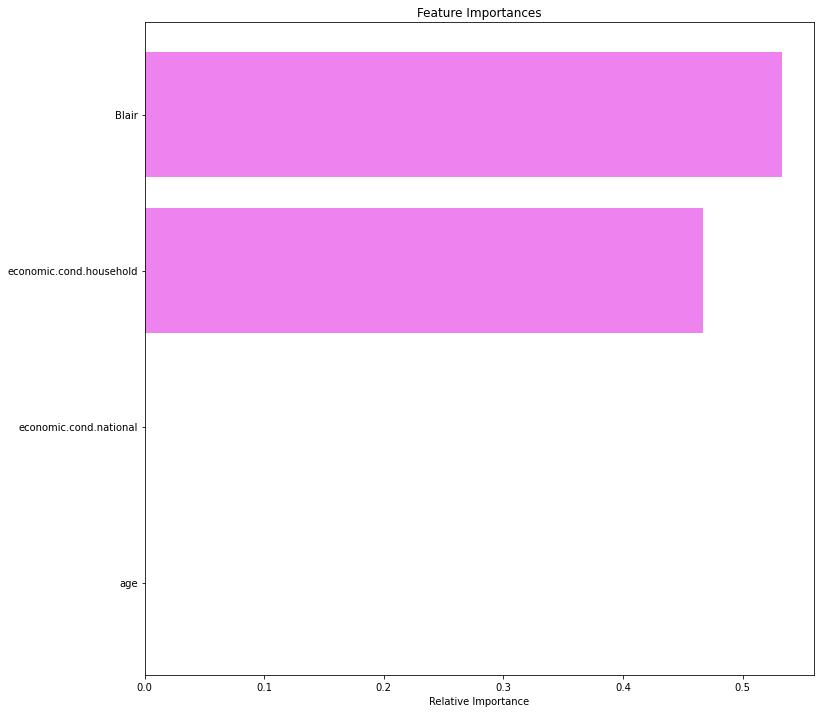

In [440]:
importances = abc_tuned.feature_importances_
indices = np.argsort(importances)
feature_names = list(X.columns)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

### Gradient Boosting Classifier

Most of the hyperparameters available are same as random forest classifier.
init: An estimator object that is used to compute the initial predictions. If ‘zero’, the initial raw predictions are set to zero. By default, a DummyEstimator predicting the classes priors is used.
There is no class_weights parameter in gradient boosting.

In [441]:
#Let's try using AdaBoost classifier as the estimator for initial predictions
gbc_init = GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),random_state=1)
gbc_init.fit(X_train,y_train)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           random_state=1)

In [289]:
def get_metrics_score(model, X_train, X_test, y_train, y_test):
    train_accuracy = model.score(X_train, y_train)
    test_accuracy = model.score(X_test, y_test)
    train_recall = recall_score(y_train, model.predict(X_train), average='macro')
    test_recall = recall_score(y_test, model.predict(X_test), average='macro')
    train_precision = precision_score(y_train, model.predict(X_train), average='macro')
    test_precision = precision_score(y_test, model.predict(X_test), average='macro')
    train_f1 = f1_score(y_train, model.predict(X_train), average='macro')
    test_f1 = f1_score(y_test, model.predict(X_test), average='macro')
    return train_accuracy, test_accuracy, train_recall, test_recall, train_precision, test_precision, train_f1, test_f1

get_metrics_score(gbc_init, X_train, X_test, y_train, y_test)

(1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0)

As compared to the model with default parameters:

Test accuracy and test recall have increased slightly.
As we are getting better results, we will use init = AdaBoostClassifier() to tune the gradient boosting model.

In [442]:
# Choose the type of classifier. 
gbc_tuned = GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),random_state=1)

# Grid of parameters to choose from
## add from article
parameters = {
    "n_estimators": [100,150,200,250],
    "subsample":[0.8,0.9,1],
    "max_features":[0.7,0.8,0.9,1]
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(gbc_tuned, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
gbc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
gbc_tuned.fit(X_train, y_train)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           max_features=0.7, random_state=1, subsample=0.8)

In [444]:
# Performance Matrix on train data set
y_train_predict = gbc_tuned.predict(X_train)
model_score = gbc_tuned.score(X_train, y_train)

# Classification Report
class_report = metrics.classification_report(y_train, y_train_predict, output_dict=True)

# Extract precision, recall, and f1-score for class 0 and 1 from the classification report
precision_0 = format(class_report['0']['precision'], '.3f').rstrip('0').rstrip('.')
recall_0 = format(class_report['0']['recall'], '.3f').rstrip('0').rstrip('.')
f1_score_0 = format(class_report['0']['f1-score'], '.3f').rstrip('0').rstrip('.')

precision_1 = format(class_report['1']['precision'], '.3f').rstrip('0').rstrip('.')
recall_1 = format(class_report['1']['recall'], '.3f').rstrip('0').rstrip('.')
f1_score_1 = format(class_report['1']['f1-score'], '.3f').rstrip('0').rstrip('.')

# Round accuracy score to 2 decimal places and remove trailing zeros
accuracy_score_formatted = format(model_score, '.3f').rstrip('0').rstrip('.')

# Create a DataFrame to store the results
gbc_tuned_train_df = pd.DataFrame({
    'Model': ['gbc_tuned_train_model'],
    'Accuracy': [accuracy_score_formatted],
    'Precision_0': [precision_0],
    'Recall_0': [recall_0],
    'F1-Score_0': [f1_score_0],
    'Precision_1': [precision_1],
    'Recall_1': [recall_1],
    'F1-Score_1': [f1_score_1]
})

# Display the DataFrame
print(gbc_tuned_train_df)

                   Model Accuracy Precision_0 Recall_0 F1-Score_0 Precision_1  \
0  gbc_tuned_train_model        1           1        1          1           1   

  Recall_1 F1-Score_1  
0        1          1  


In [445]:
# Performance Matrix on test data set
y_test_predict = gbc_tuned.predict(X_test)
model_score = gbc_tuned.score(X_test, y_test)

# Classification Report
class_report = metrics.classification_report(y_test, y_test_predict, output_dict=True)

# Extract precision, recall, and f1-score for class 0 and 1 from the classification report
precision_0 = format(class_report['0']['precision'], '.3f').rstrip('0').rstrip('.')
recall_0 = format(class_report['0']['recall'], '.3f').rstrip('0').rstrip('.')
f1_score_0 = format(class_report['0']['f1-score'], '.3f').rstrip('0').rstrip('.')

precision_1 = format(class_report['1']['precision'], '.3f').rstrip('0').rstrip('.')
recall_1 = format(class_report['1']['recall'], '.3f').rstrip('0').rstrip('.')
f1_score_1 = format(class_report['1']['f1-score'], '.3f').rstrip('0').rstrip('.')

# Round accuracy score to 2 decimal places and remove trailing zeros
accuracy_score_formatted = format(model_score, '.3f').rstrip('0').rstrip('.')

# Create a DataFrame to store the results
gbc_tuned_test_df = pd.DataFrame({
    'Model': ['gbc_tune_test_model'],
    'Accuracy': [accuracy_score_formatted],
    'Precision_0': [precision_0],
    'Recall_0': [recall_0],
    'F1-Score_0': [f1_score_0],
    'Precision_1': [precision_1],
    'Recall_1': [recall_1],
    'F1-Score_1': [f1_score_1]
})

# Display the DataFrame
print(gbc_tuned_test_df)

                 Model Accuracy Precision_0 Recall_0 F1-Score_0 Precision_1  \
0  gbc_tune_test_model    0.956           1        1          1       0.944   

  Recall_1 F1-Score_1  
0    0.944      0.944  


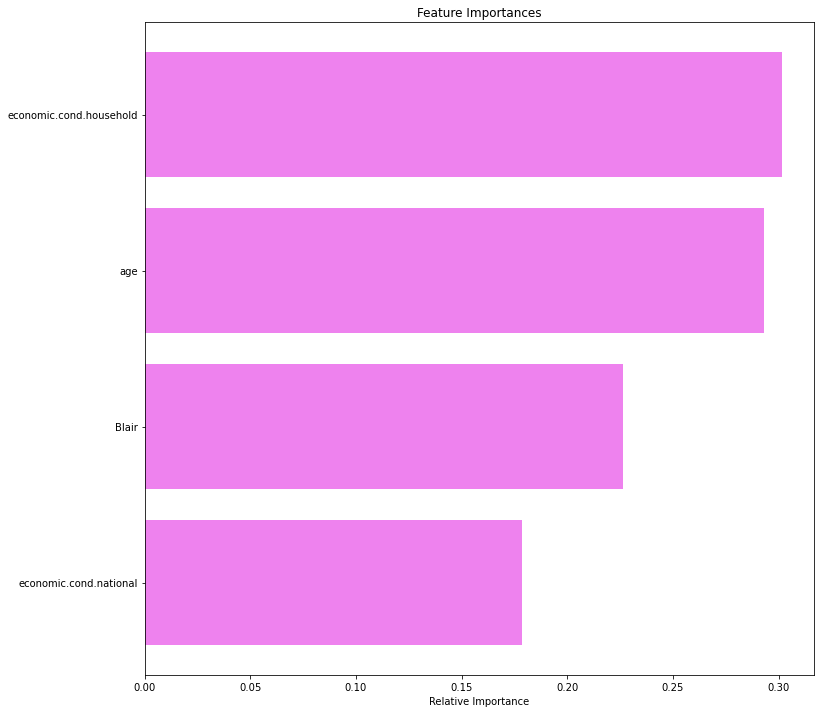

In [446]:
importances = gbc_tuned.feature_importances_
indices = np.argsort(importances)
feature_names = list(X.columns)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

### XGBoost Classifier

XGBoost has many hyper parameters which can be tuned to increase the model performance.

Some of the important parameters are:

- scale_pos_weight:Control the balance of positive and negative weights, useful for unbalanced classes. It has range from 0 to  ∞
- subsample: Corresponds to the fraction of observations (the rows) to subsample at each step. By default it is set to 1 meaning that we use all rows.
- colsample_bytree: Corresponds to the fraction of features (the columns) to use.
- colsample_bylevel: The subsample ratio of columns for each level. Columns are subsampled from the set of columns chosen for the current tree.
- colsample_bynode: The subsample ratio of columns for each node (split). Columns are subsampled from the set of columns chosen for the current level.
- max_depth: is the maximum number of nodes allowed from the root to the farthest leaf of a tree.
- learning_rate/eta: Makes the model more robust by shrinking the weights on each step.
- gamma: A node is split only when the resulting split gives a positive reduction in the loss function. Gamma specifies the minimum loss reduction required to make a split.

In [447]:
# Choose the type of classifier. 
xgb_tuned = XGBClassifier(random_state=1)

# Grid of parameters to choose from
## add from
parameters = {
    "n_estimators": np.arange(10,100,20),
    "scale_pos_weight":[0,1,2,5],
    "subsample":[0.5,0.7,0.9,1],
    "learning_rate":[0.01,0.1,0.2,0.05],
    "gamma":[0,1,3],
    "colsample_bytree":[0.5,0.7,0.9,1],
    "colsample_bylevel":[0.5,0.7,0.9,1]
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(xgb_tuned, parameters,scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
xgb_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
xgb_tuned.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=0.5, colsample_bynode=None,
              colsample_bytree=0.5, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=10, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [449]:
# Performance Matrix on train data set
y_train_predict = xgb_tuned.predict(X_train)
model_score = xgb_tuned.score(X_train, y_train)

# Classification Report
class_report = metrics.classification_report(y_train, y_train_predict, output_dict=True)

# Extract precision, recall, and f1-score for class 0 and 1 from the classification report
precision_0 = format(class_report['0']['precision'], '.3f').rstrip('0').rstrip('.')
recall_0 = format(class_report['0']['recall'], '.3f').rstrip('0').rstrip('.')
f1_score_0 = format(class_report['0']['f1-score'], '.3f').rstrip('0').rstrip('.')

precision_1 = format(class_report['1']['precision'], '.3f').rstrip('0').rstrip('.')
recall_1 = format(class_report['1']['recall'], '.3f').rstrip('0').rstrip('.')
f1_score_1 = format(class_report['1']['f1-score'], '.3f').rstrip('0').rstrip('.')

# Round accuracy score to 2 decimal places and remove trailing zeros
accuracy_score_formatted = format(model_score, '.3f').rstrip('0').rstrip('.')

# Create a DataFrame to store the results
xgb_tuned_train_df = pd.DataFrame({
    'Model': ['xgb_tuned_train_model'],
    'Accuracy': [accuracy_score_formatted],
    'Precision_0': [precision_0],
    'Recall_0': [recall_0],
    'F1-Score_0': [f1_score_0],
    'Precision_1': [precision_1],
    'Recall_1': [recall_1],
    'F1-Score_1': [f1_score_1]
})

# Display the DataFrame
print(xgb_tuned_train_df)

                   Model Accuracy Precision_0 Recall_0 F1-Score_0 Precision_1  \
0  xgb_tuned_train_model    0.962           1        1          1       0.938   

  Recall_1 F1-Score_1  
0    0.938      0.938  


In [450]:
# Performance Matrix on test data set
y_test_predict = xgb_tuned.predict(X_test)
model_score = xgb_tuned.score(X_test, y_test)

# Classification Report
class_report = metrics.classification_report(y_test, y_test_predict, output_dict=True)

# Extract precision, recall, and f1-score for class 0 and 1 from the classification report
precision_0 = format(class_report['0']['precision'], '.3f').rstrip('0').rstrip('.')
recall_0 = format(class_report['0']['recall'], '.3f').rstrip('0').rstrip('.')
f1_score_0 = format(class_report['0']['f1-score'], '.3f').rstrip('0').rstrip('.')

precision_1 = format(class_report['1']['precision'], '.3f').rstrip('0').rstrip('.')
recall_1 = format(class_report['1']['recall'], '.3f').rstrip('0').rstrip('.')
f1_score_1 = format(class_report['1']['f1-score'], '.3f').rstrip('0').rstrip('.')

# Round accuracy score to 2 decimal places and remove trailing zeros
accuracy_score_formatted = format(model_score, '.3f').rstrip('0').rstrip('.')

# Create a DataFrame to store the results
xgb_tuned_test_df = pd.DataFrame({
    'Model': ['xgb_tuned_test_model'],
    'Accuracy': [accuracy_score_formatted],
    'Precision_0': [precision_0],
    'Recall_0': [recall_0],
    'F1-Score_0': [f1_score_0],
    'Precision_1': [precision_1],
    'Recall_1': [recall_1],
    'F1-Score_1': [f1_score_1]
})

# Display the DataFrame
print(xgb_tuned_test_df)

                  Model Accuracy Precision_0 Recall_0 F1-Score_0 Precision_1  \
0  xgb_tuned_test_model    0.933           1        1          1       0.941   

  Recall_1 F1-Score_1  
0    0.889      0.914  


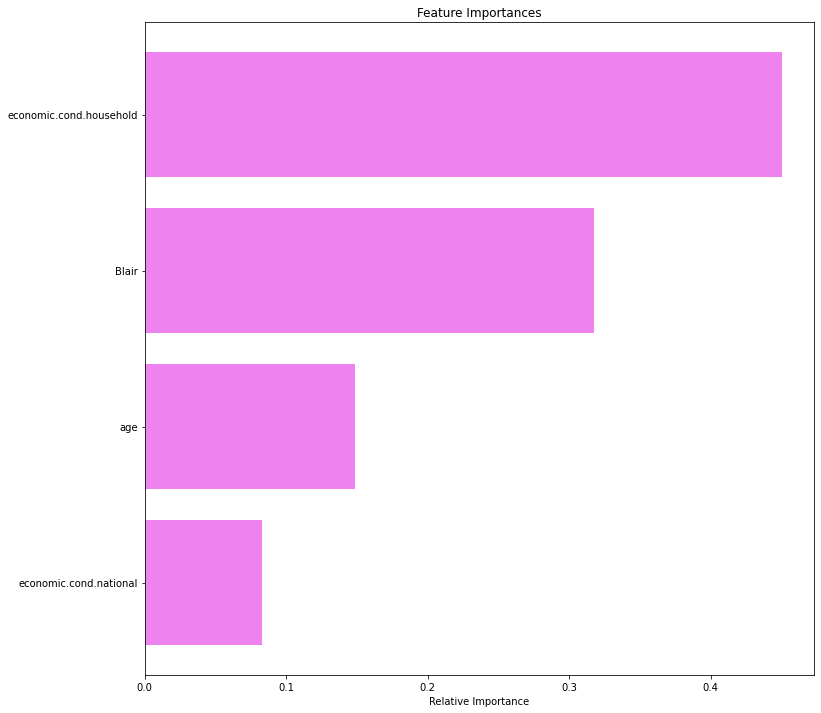

In [451]:
importances = xgb_tuned.feature_importances_
indices = np.argsort(importances)
feature_names = list(X.columns)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

## 6) Final Model Selection, i.e. Comparing all models

In [452]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        KNN_train_df.T,
        NB_train_df.T,
        Bagging_train_df.T,
        abc_train_df.T,
        gbc_train_df.T,
        xgb_train_df.T,
        
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "KNN",
    "Naive Bayes",
    "Bagging",
    "Ada Boosting",
    "Gradient Boosting Classifier",
    "XG Boost Classifier"
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,KNN,Naive Bayes,Bagging,Ada Boosting,Gradient Boosting Classifier,XG Boost Classifier
Model,KNN_train_model,NB_train_model,Bagging_train_model,abc_train_model,gbc_train_model,xgb_train_model
Accuracy,0.85,0.82,1,0.84,0.87,0.995
Precision_0,0.88,0.87,1,0.87,0.89,0.995
Recall_0,0.91,0.88,1,0.91,0.93,0.999
F1-Score_0,0.89,0.87,1,0.89,0.91,0.997
Precision_1,0.78,0.71,1,0.76,0.82,0.997
Recall_1,0.71,0.69,1,0.67,0.73,0.988
F1-Score_1,0.74,0.7,1,0.72,0.77,0.992


In [453]:
#testing performance comparison

models_test_comp_df = pd.concat(
    [
        KNN_test_df.T,
        NB_test_df.T,
        Bagging_test_df.T,
        abc_test_df.T,
        gbc_test_df.T,
        xgb_test_df.T,
        
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "KNN",
    "Naive Bayes",
    "Bagging",
    "Ada Boosting",
    "Gradient Boosting Classifier",
    "XG Boost Classifier"
]
print("Testing performance comparison:")
models_test_comp_df

Testing performance comparison:


,KNN,Naive Bayes,Bagging,Ada Boosting,Gradient Boosting Classifier,XG Boost Classifier
Model,KNN_test_model,NB_test_model,Bagging_test_model,abc_test_model,gbc_test_model,xgb_test_model
Accuracy,0.83,0.86,0.83,0.86,0.87,0.849
Precision_0,0.86,0.89,0.87,0.86,0.88,0.877
Recall_0,0.9,0.92,0.9,0.94,0.94,0.912
F1-Score_0,0.88,0.9,0.88,0.9,0.91,0.894
Precision_1,0.75,0.79,0.75,0.84,0.84,0.778
Recall_1,0.68,0.73,0.68,0.66,0.7,0.705
F1-Score_1,0.71,0.76,0.71,0.74,0.76,0.74


In [456]:
#tuned model performance comparison (train set)

models_test_comp_df = pd.concat(
    [
        tuned_bagging_train_df.T,
        abc_tuned_train_df.T,
        gbc_tuned_train_df.T,
        xgb_tuned_train_df.T,
        
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Bagging train",
    "AdaBoost train",
    "GradientBoost train",
    "XGBoost train"
]
print("Tuned model performance comparison:")
models_test_comp_df

Tuned model performance comparison:


,Bagging train,AdaBoost train,GradientBoost train,XGBoost train
Model,tuned_bagging_train_model,abc_tuned_train_model,gbc_tuned_train_model,xgb_tuned_train_model
Accuracy,0.962,0.956,1,0.962
Precision_0,1,1,1,1
Recall_0,1,1,1,1
F1-Score_0,1,1,1,1
Precision_1,1,0.912,1,0.938
Recall_1,1,0.969,1,0.938
F1-Score_1,1,0.939,1,0.938


In [457]:
#tuned model performance comparison (test set)

models_test_comp_df = pd.concat(
    [
        tuned_bagging_test_df.T,
        abc_tuned_test_df.T,
        gbc_tuned_test_df.T,
        xgb_tuned_test_df.T,
        
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Bagging test",
    "AdaBoost test",
    "GradientBoost test",
    "XGBoost test"
]
print("Tuned model performance comparison:")
models_test_comp_df

Tuned model performance comparison:


,Bagging test,AdaBoost test,GradientBoost test,XGBoost test
Model,tuned_bagging_test_model,abc_tuned_test_model,gbc_tune_test_model,xgb_tuned_test_model
Accuracy,0.956,0.956,0.956,0.933
Precision_0,1,1,1,1
Recall_0,1,1,1,1
F1-Score_0,1,1,1,1
Precision_1,0.947,1,0.944,0.941
Recall_1,1,1,0.944,0.889
F1-Score_1,0.973,1,0.944,0.914


# Problem 2

In this particular project, we are going to work on the inaugural corpora from the nltk in Python. We will be looking at the following speeches of the Presidents of the United States of America:

- President Franklin D. Roosevelt in 1941
- President John F. Kennedy in 1961
- President Richard Nixon in 1973

In [299]:
import nltk
nltk.download('inaugural')
from nltk.corpus import inaugural
inaugural.fileids()

[nltk_data] Downloading package inaugural to C:\Users\AISHWARYA
[nltk_data]     HARIHARAN\AppData\Roaming\nltk_data...
[nltk_data]   Package inaugural is already up-to-date!


['1789-Washington.txt',
 '1793-Washington.txt',
 '1797-Adams.txt',
 '1801-Jefferson.txt',
 '1805-Jefferson.txt',
 '1809-Madison.txt',
 '1813-Madison.txt',
 '1817-Monroe.txt',
 '1821-Monroe.txt',
 '1825-Adams.txt',
 '1829-Jackson.txt',
 '1833-Jackson.txt',
 '1837-VanBuren.txt',
 '1841-Harrison.txt',
 '1845-Polk.txt',
 '1849-Taylor.txt',
 '1853-Pierce.txt',
 '1857-Buchanan.txt',
 '1861-Lincoln.txt',
 '1865-Lincoln.txt',
 '1869-Grant.txt',
 '1873-Grant.txt',
 '1877-Hayes.txt',
 '1881-Garfield.txt',
 '1885-Cleveland.txt',
 '1889-Harrison.txt',
 '1893-Cleveland.txt',
 '1897-McKinley.txt',
 '1901-McKinley.txt',
 '1905-Roosevelt.txt',
 '1909-Taft.txt',
 '1913-Wilson.txt',
 '1917-Wilson.txt',
 '1921-Harding.txt',
 '1925-Coolidge.txt',
 '1929-Hoover.txt',
 '1933-Roosevelt.txt',
 '1937-Roosevelt.txt',
 '1941-Roosevelt.txt',
 '1945-Roosevelt.txt',
 '1949-Truman.txt',
 '1953-Eisenhower.txt',
 '1957-Eisenhower.txt',
 '1961-Kennedy.txt',
 '1965-Johnson.txt',
 '1969-Nixon.txt',
 '1973-Nixon.txt',
 '1

In [300]:
roosevelt = inaugural.raw('1941-Roosevelt.txt')
roosevelt

'On each national day of inauguration since 1789, the people have renewed their sense of dedication to the United States.\n\nIn Washington\'s day the task of the people was to create and weld together a nation.\n\nIn Lincoln\'s day the task of the people was to preserve that Nation from disruption from within.\n\nIn this day the task of the people is to save that Nation and its institutions from disruption from without.\n\nTo us there has come a time, in the midst of swift happenings, to pause for a moment and take stock -- to recall what our place in history has been, and to rediscover what we are and what we may be. If we do not, we risk the real peril of inaction.\n\nLives of nations are determined not by the count of years, but by the lifetime of the human spirit. The life of a man is three-score years and ten: a little more, a little less. The life of a nation is the fullness of the measure of its will to live.\n\nThere are men who doubt this. There are men who believe that democr

In [301]:
kennedy = inaugural.raw('1961-Kennedy.txt')
kennedy

'Vice President Johnson, Mr. Speaker, Mr. Chief Justice, President Eisenhower, Vice President Nixon, President Truman, reverend clergy, fellow citizens, we observe today not a victory of party, but a celebration of freedom -- symbolizing an end, as well as a beginning -- signifying renewal, as well as change. For I have sworn I before you and Almighty God the same solemn oath our forebears l prescribed nearly a century and three quarters ago.\n\nThe world is very different now. For man holds in his mortal hands the power to abolish all forms of human poverty and all forms of human life. And yet the same revolutionary beliefs for which our forebears fought are still at issue around the globe -- the belief that the rights of man come not from the generosity of the state, but from the hand of God.\n\nWe dare not forget today that we are the heirs of that first revolution. Let the word go forth from this time and place, to friend and foe alike, that the torch has been passed to a new gener

In [302]:
nixon = inaugural.raw('1973-Nixon.txt')
nixon

'Mr. Vice President, Mr. Speaker, Mr. Chief Justice, Senator Cook, Mrs. Eisenhower, and my fellow citizens of this great and good country we share together:\n\nWhen we met here four years ago, America was bleak in spirit, depressed by the prospect of seemingly endless war abroad and of destructive conflict at home.\n\nAs we meet here today, we stand on the threshold of a new era of peace in the world.\n\nThe central question before us is: How shall we use that peace? Let us resolve that this era we are about to enter will not be what other postwar periods have so often been: a time of retreat and isolation that leads to stagnation at home and invites new danger abroad.\n\nLet us resolve that this will be what it can become: a time of great responsibilities greatly borne, in which we renew the spirit and the promise of America as we enter our third century as a nation.\n\nThis past year saw far-reaching results from our new policies for peace. By continuing to revitalize our traditional

### Find the number of Character, words & sentences in all three speeches 

In [303]:
def count_characters(text):
    return len(text)

character_count1 = count_characters(roosevelt)
print("Number of characters in Roosevelt's speech:", character_count1)

def count_words(text):
    words = text.split()  # Split the text into words based on whitespace
    return len(words)

word_count1 = count_words(roosevelt)
print("Number of words in Roosevelt's speech:", word_count1)

def count_sentences(text):
    # Split the text into sentences based on common punctuation marks
    # Note: This might not cover all cases, but it's a simple approach.
    sentences = text.split(".")
    sentences += text.split("?")
    sentences += text.split("!")
    # Remove empty strings resulting from consecutive punctuation marks
    sentences = [sentence for sentence in sentences if sentence.strip()]
    return len(sentences)

sentence_count1 = count_sentences(roosevelt)
print("Number of sentences in Roosevelt's speech:", sentence_count1)


Number of characters in Roosevelt's speech: 7571
Number of words in Roosevelt's speech: 1360
Number of sentences in Roosevelt's speech: 70


In [304]:
character_count2 = count_characters(kennedy)
print("Number of characters in Kennedy's speech:", character_count2)

word_count2 = count_words(kennedy)
print("Number of words in Kennedy's speech:", word_count2)

sentence_count2 = count_sentences(kennedy)
print("Number of sentences in Kennedy's speech:", sentence_count2)

Number of characters in Kennedy's speech: 7618
Number of words in Kennedy's speech: 1390
Number of sentences in Kennedy's speech: 57


In [305]:
character_count3 = count_characters(nixon)
print("Number of characters in Nixon's speech:", character_count3)

word_count3 = count_words(nixon)
print("Number of words in Nixon's speech:", word_count3)

sentence_count3 = count_sentences(nixon)
print("Number of sentences in Nixon's speech:", sentence_count3)

Number of characters in Nixon's speech: 9991
Number of words in Nixon's speech: 1819
Number of sentences in Nixon's speech: 74


## Text cleaning 

## Remove stopwords, stemming, and 3 most common words 

### For Roosevelt 

In [306]:
import nltk
from collections import Counter
import re

# Download NLTK resources (only need to do this once)
nltk.download('punkt')

#Stopwords

import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

def remove_stopwords(text):
    # Tokenize the text into words
    words = nltk.word_tokenize(text)
    # Get the list of English stopwords
    stop_words = set(stopwords.words('english'))
    # Filter out stopwords from the text
    filtered_words = [word for word in words if word.lower() not in stop_words]
    # Recreate the text from the filtered words
    filtered_text = ' '.join(filtered_words)
    return filtered_text


text_without_stopwords1 = remove_stopwords(roosevelt)
print("Roosevelt's speech without stopwords:", text_without_stopwords1)


Roosevelt's speech without stopwords: national day inauguration since 1789 , people renewed sense dedication United States . Washington 's day task people create weld together nation . Lincoln 's day task people preserve Nation disruption within . day task people save Nation institutions disruption without . us come time , midst swift happenings , pause moment take stock -- recall place history , rediscover may . , risk real peril inaction . Lives nations determined count years , lifetime human spirit . life man three-score years ten : little , little less . life nation fullness measure live . men doubt . men believe democracy , form Government frame life , limited measured kind mystical artificial fate , unexplained reason , tyranny slavery become surging wave future -- freedom ebbing tide . Americans know true . Eight years ago , life Republic seemed frozen fatalistic terror , proved true . midst shock -- acted . acted quickly , boldly , decisively . later years living years -- fruit

[nltk_data] Downloading package punkt to C:\Users\AISHWARYA
[nltk_data]     HARIHARAN\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\AISHWARYA
[nltk_data]     HARIHARAN\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [307]:
#Stemming

import nltk
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

# Download NLTK resources (only need to do this once)
nltk.download('punkt')

def stem_text(text):
    # Tokenize the text into words
    words = word_tokenize(text)
    
    # Initialize the Porter Stemmer
    porter = PorterStemmer()
    
    # Stem each word in the text
    stemmed_words = [porter.stem(word) for word in words]
    
    # Recreate the text from the stemmed words
    stemmed_text = ' '.join(stemmed_words)
    return stemmed_text

stemmed_text1 = stem_text(text_without_stopwords1)
print("Stemmed text of Roosevelt:", stemmed_text1)


[nltk_data] Downloading package punkt to C:\Users\AISHWARYA
[nltk_data]     HARIHARAN\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Stemmed text of Roosevelt: nation day inaugur sinc 1789 , peopl renew sens dedic unit state . washington 's day task peopl creat weld togeth nation . lincoln 's day task peopl preserv nation disrupt within . day task peopl save nation institut disrupt without . us come time , midst swift happen , paus moment take stock -- recal place histori , rediscov may . , risk real peril inact . live nation determin count year , lifetim human spirit . life man three-scor year ten : littl , littl less . life nation full measur live . men doubt . men believ democraci , form govern frame life , limit measur kind mystic artifici fate , unexplain reason , tyranni slaveri becom surg wave futur -- freedom eb tide . american know true . eight year ago , life republ seem frozen fatalist terror , prove true . midst shock -- act . act quickli , boldli , decis . later year live year -- fruit year peopl democraci . brought us greater secur , hope , better understand life 's ideal measur materi thing . vital pr

In [308]:
#3 most common words
from collections import Counter
import re

def find_most_common_words(text, n=3):
    # Tokenize the text into words
    words = re.findall(r'\b\w+\b', text.lower())  # Using regex to extract words
    
    # Count the occurrences of each word
    word_counts = Counter(words)
    
    # Get the n most common words
    most_common_words = word_counts.most_common(n)
    
    return most_common_words

common_words1 = find_most_common_words(stemmed_text1)
print("Three most common words in Roosevelt's speech:", common_words1)

Three most common words in Roosevelt's speech: [('nation', 17), ('know', 10), ('peopl', 9)]


### For Kennedy 

In [309]:
#Stopwords

text_without_stopwords2= remove_stopwords(kennedy)
print("Kennedy's speech without stopwords:", text_without_stopwords2)

Kennedy's speech without stopwords: Vice President Johnson , Mr. Speaker , Mr. Chief Justice , President Eisenhower , Vice President Nixon , President Truman , reverend clergy , fellow citizens , observe today victory party , celebration freedom -- symbolizing end , well beginning -- signifying renewal , well change . sworn Almighty God solemn oath forebears l prescribed nearly century three quarters ago . world different . man holds mortal hands power abolish forms human poverty forms human life . yet revolutionary beliefs forebears fought still issue around globe -- belief rights man come generosity state , hand God . dare forget today heirs first revolution . Let word go forth time place , friend foe alike , torch passed new generation Americans -- born century , tempered war , disciplined hard bitter peace , proud ancient heritage -- unwilling witness permit slow undoing human rights Nation always committed , committed today home around world . Let every nation know , whether wishe

In [310]:
#Stemming

stemmed_text2 = stem_text(text_without_stopwords2)
print("Stemmed text of Kennedy:", stemmed_text2)

Stemmed text of Kennedy: vice presid johnson , mr. speaker , mr. chief justic , presid eisenhow , vice presid nixon , presid truman , reverend clergi , fellow citizen , observ today victori parti , celebr freedom -- symbol end , well begin -- signifi renew , well chang . sworn almighti god solemn oath forebear l prescrib nearli centuri three quarter ago . world differ . man hold mortal hand power abolish form human poverti form human life . yet revolutionari belief forebear fought still issu around globe -- belief right man come generos state , hand god . dare forget today heir first revolut . let word go forth time place , friend foe alik , torch pass new gener american -- born centuri , temper war , disciplin hard bitter peac , proud ancient heritag -- unwil wit permit slow undo human right nation alway commit , commit today home around world . let everi nation know , whether wish us well ill , shall pay price , bear burden , meet hardship , support friend , oppos foe , order assur s

In [311]:
#3 most common words

common_words2 = find_most_common_words(stemmed_text2)
print("Three most common words in Kennedy's speech:", common_words2)

Three most common words in Kennedy's speech: [('let', 16), ('us', 12), ('power', 9)]


### For Nixon

In [312]:
#Stopwords

text_without_stopwords3= remove_stopwords(nixon)
print("Nixon's speech without stopwords:", text_without_stopwords3)

Nixon's speech without stopwords: Mr. Vice President , Mr. Speaker , Mr. Chief Justice , Senator Cook , Mrs. Eisenhower , fellow citizens great good country share together : met four years ago , America bleak spirit , depressed prospect seemingly endless war abroad destructive conflict home . meet today , stand threshold new era peace world . central question us : shall use peace ? Let us resolve era enter postwar periods often : time retreat isolation leads stagnation home invites new danger abroad . Let us resolve become : time great responsibilities greatly borne , renew spirit promise America enter third century nation . past year saw far-reaching results new policies peace . continuing revitalize traditional friendships , missions Peking Moscow , able establish base new durable pattern relationships among nations world . America 's bold initiatives , 1972 long remembered year greatest progress since end World War II toward lasting peace world . peace seek world flimsy peace merely

In [313]:
#Stemming

stemmed_text3 = stem_text(text_without_stopwords3)
print("Stemmed text of Nixon:", stemmed_text3)

Stemmed text of Nixon: mr. vice presid , mr. speaker , mr. chief justic , senat cook , mrs. eisenhow , fellow citizen great good countri share togeth : met four year ago , america bleak spirit , depress prospect seemingli endless war abroad destruct conflict home . meet today , stand threshold new era peac world . central question us : shall use peac ? let us resolv era enter postwar period often : time retreat isol lead stagnat home invit new danger abroad . let us resolv becom : time great respons greatli born , renew spirit promis america enter third centuri nation . past year saw far-reach result new polici peac . continu revit tradit friendship , mission peke moscow , abl establish base new durabl pattern relationship among nation world . america 's bold initi , 1972 long rememb year greatest progress sinc end world war ii toward last peac world . peac seek world flimsi peac mere interlud war , peac endur gener come . import understand necess limit america 's role maintain peac . 

In [314]:
#3 most common words

common_words3 = find_most_common_words(stemmed_text3)
print("Three most common words in Nixon's speech:", common_words3)

Three most common words in Nixon's speech: [('us', 26), ('let', 22), ('america', 21)]


## Word cloud 

### Roosevelt

In [315]:
# Word Cloud 
from wordcloud import WordCloud
wordcloud = WordCloud(width = 3000, height = 3000, 
                background_color ='black', 
                min_font_size = 10, random_state=100).generate(stemmed_text1) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off")
plt.xlabel('Word Cloud')
plt.tight_layout(pad = 0) 


plt.show()


ValueError: Only supported for TrueType fonts

### Kennedy 

In [ ]:
# Word Cloud 
from wordcloud import WordCloud
wordcloud = WordCloud(width = 3000, height = 3000, 
                background_color ='white', 
                min_font_size = 10, random_state=100).generate(stemmed_text2) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off")
plt.xlabel('Word Cloud')
plt.tight_layout(pad = 0) 


plt.show()


### Nixon 

In [ ]:
# Word Cloud 
from wordcloud import WordCloud
wordcloud = WordCloud(width = 3000, height = 3000, 
                background_color ='black', 
                min_font_size = 10, random_state=100).generate(stemmed_text3) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off")
plt.xlabel('Word Cloud')
plt.tight_layout(pad = 0) 


plt.show()
